<a href="https://colab.research.google.com/github/Kostia2004/DogBot/blob/main/dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import numpy as np
import os
import sys
import random
import warnings
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread

import keras

from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten, Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization, Input
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.callbacks import Callback, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
import shutil
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import load_model

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

import tensorflow as tf

from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor

from keras.applications import MobileNetV2

from keras.applications.nasnet import NASNetMobile

from IPython.display import Image
import tensorflow_hub as hub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xf /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/dogs/dogs2.tar.lzma	
!mv ./home/konstantin/Downloads/dogs1 ./
!rm -r home/

In [ ]:
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
np.random.seed(7)

start = dt.datetime.now()

BATCH_SIZE = 128
EPOCHS = 15
TESTING_SPLIT=0.2	

NUM_CLASSES = 120
IMAGE_SIZE = 224

#strModelFileName = "models/ResNet50.h5"

# strModelFileName = "models/InceptionV3.h5"
#strModelFileName = "models/InceptionV3_Sgd.h5"

#IMAGE_SIZE = 224
#strModelFileName = "models/MobileNetV2.h5"

#IMAGE_SIZE = 224
#strModelFileName = "models/NASNetMobileSgd.h5"

In [ ]:
working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')
labels

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [ ]:
train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

8177 train ids 2045 validation ids
Total 10222 testing images


In [ ]:
breeds = np.unique(labels['breed'])
map_characters = {} #{0:'none'}
num = 0
for i in range(len(breeds)):
  map_characters[i] = breeds[i]
  print(breeds[i])
  num = i
print(num)

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle
bedlington_terrier
bernese_mountain_dog
black-and-tan_coonhound
blenheim_spaniel
bloodhound
bluetick
border_collie
border_terrier
borzoi
boston_bull
bouvier_des_flandres
boxer
brabancon_griffon
briard
brittany_spaniel
bull_mastiff
cairn
cardigan
chesapeake_bay_retriever
chihuahua
chow
clumber
cocker_spaniel
collie
curly-coated_retriever
dandie_dinmont
dhole
dingo
doberman
english_foxhound
english_setter
english_springer
entlebucher
eskimo_dog
flat-coated_retriever
french_bulldog
german_shepherd
german_short-haired_pointer
giant_schnauzer
golden_retriever
gordon_setter
great_dane
great_pyrenees
greater_swiss_mountain_dog
groenendael
ibizan_hound
irish_setter
irish_terrier
irish_water_spaniel
irish_wolfhound
italian_greyhound
japanese_spaniel
keeshond
kelpie
kerry_blue_terrier
komondor
kuvasz
labrador_retriever
lakeland_terrier
leonberg
lhasa
malamut

In [ ]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     0b1e71a499a26eaacc06991bca982523  scottish_deerhound
freq                                   1                 126

In [ ]:
#median number of image in each class.
labels['breed'].value_counts().median()

82.0

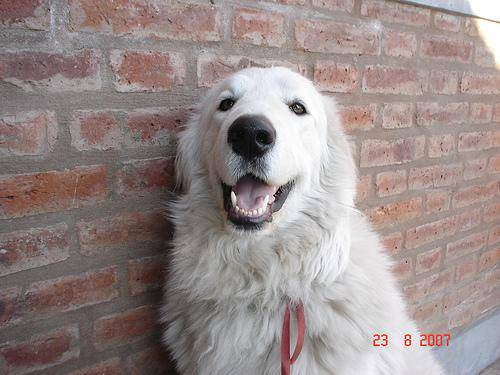

In [ ]:
Image("/content/dogs1/train/0a0c223352985ec154fd604d7ddceabd.jpg")

In [ ]:
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]
filenames[:5]

['/content/dogs1/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/dogs1/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/dogs1/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/dogs1/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/dogs1/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
if len(os.listdir('/content/dogs1/train/')) == len(filenames):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')

Number of file matches number of actual images!


golden_retriever


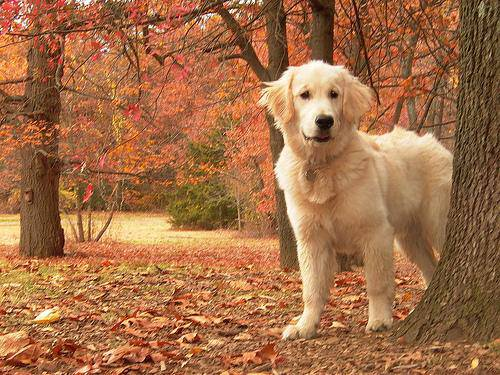

In [ ]:
print(labels['breed'][961])
Image(filenames[961])

Turning data into numbers


In [ ]:
dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)
dogs_labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
if len(dogs_labels) == len(filenames):
    print('Number of labels matches the number of filenames.')
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels matches the number of filenames.


In [ ]:
unique_breed = np.unique(dogs_labels) 
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Turn single label into an array of boolean.
print(dogs_labels[0])
dogs_labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Turining boolean arrays into integers.
print(dogs_labels[0])   #orginal index
print(np.where(unique_breed==dogs_labels[0]))    #index where labels occurs.
#print(boolean_labels[0].argmax())     #index where label occurs in boolean array
print(boolean_labels[0].astype(int))   #there will be a 1 where sample label occurs

boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own validation set.


In [ ]:
X = filenames
y = boolean_labels

In [ ]:
print(len(X), len(y))

10222 10222


In [ ]:
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

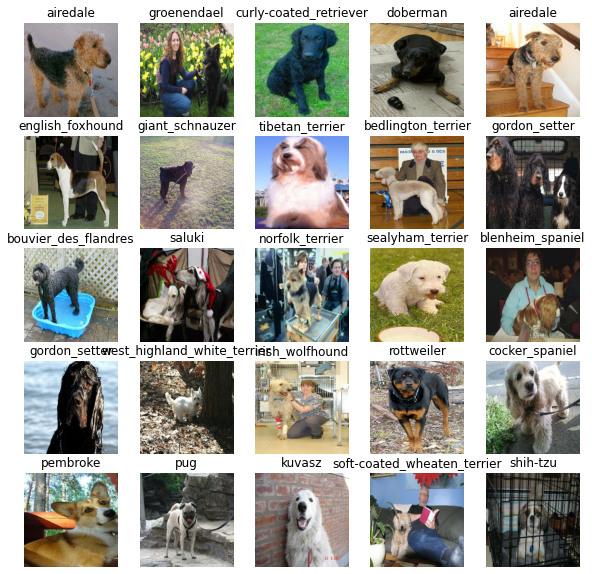

In [ ]:
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breed[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# CАМАЯ КРУТАЯ НЕЙРОНКА


In [ ]:
BATCH_SIZE = 64
EPOCHS = 16
TESTING_SPLIT=0.1

NUM_CLASSES = 120
IMAGE_SIZE = 224

In [ ]:
working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breed)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    Dropout(0.4),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.SGD(momentum=0.1), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

def testModel(iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = create_model()
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

9199 train ids 1023 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
144/144 [==============================] - 47s 259ms/step - loss: 4.9557 - accuracy: 0.0765 - val_loss: 2.0006 - val_accuracy: 0.5376
Epoch 2/16
144/144 [==============================] - 39s 270ms/step - loss: 2.2305 - accuracy: 0.4330 - val_loss: 1.1837 - val_accuracy: 0.7028
Epoch 3/16
144/144 [==============================] - 39s 270ms/step - loss: 1.5158 - accuracy: 0.5909 - val_loss: 0.9285 - val_accuracy: 0.7478
Epoch 4/16
144/144 [==============================] - 39s 271ms/step - loss: 1.2061 - accuracy: 0.6647 - val_loss: 0.8066 - val_accuracy: 0.7781
Epoch 5/16
144/144 [==============================] - 36s 252ms/step - loss: 1.0724 - accuracy: 0.6983 - val_loss: 0.7460 - val_accuracy: 0.7752
Epoch 6/16
144/144 [==============================] - 35s 245ms/step - loss: 0.9289 - accuracy: 0.7223 - val_loss: 0.7058 - val_accuracy: 0.7928
Epoch 7/16
144/144 [=================

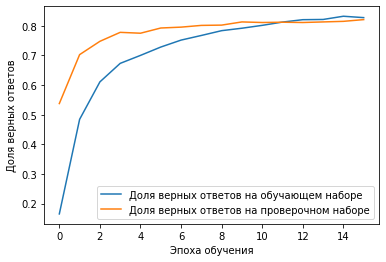

Среднее:  0.7770039103925228
Медиана:  0.8025415539741516
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
144/144 [==============================] - 41s 263ms/step - loss: 5.1911 - accuracy: 0.0647 - val_loss: 2.0961 - val_accuracy: 0.5308
Epoch 2/16
144/144 [==============================] - 36s 249ms/step - loss: 2.2672 - accuracy: 0.4318 - val_loss: 1.2219 - val_accuracy: 0.6979
Epoch 3/16
144/144 [==============================] - 39s 272ms/step - loss: 1.5162 - accuracy: 0.5927 - val_loss: 0.9399 - val_accuracy: 0.7576
Epoch 4/16
144/144 [==============================] - 39s 273ms/step - loss: 1.2585 - accuracy: 0.6435 - val_loss: 0.8180 - val_accuracy: 0.7801
Epoch 5/16
144/144 [==============================] - 39s 271ms/step - loss: 1.0480 - accuracy: 0.7009 - val_loss: 0.7569 - val_accuracy: 0.7820
Epoch 6/16
144/144 [==============================] - 39s 272ms/step - loss: 0.9236 - accuracy: 0.7372 - val_loss: 0.7105 - 

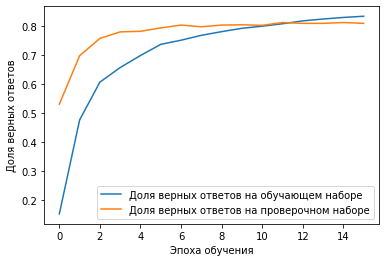

Среднее:  0.7754154466092587
Медиана:  0.803519070148468
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
144/144 [==============================] - 34s 219ms/step - loss: 5.0401 - accuracy: 0.0718 - val_loss: 2.0138 - val_accuracy: 0.5327
Epoch 2/16
144/144 [==============================] - 31s 217ms/step - loss: 2.2253 - accuracy: 0.4401 - val_loss: 1.1645 - val_accuracy: 0.7224
Epoch 3/16
144/144 [==============================] - 32s 219ms/step - loss: 1.5243 - accuracy: 0.5833 - val_loss: 0.9151 - val_accuracy: 0.7674
Epoch 4/16
144/144 [==============================] - 31s 217ms/step - loss: 1.2108 - accuracy: 0.6631 - val_loss: 0.8024 - val_accuracy: 0.7859
Epoch 5/16
144/144 [==============================] - 31s 218ms/step - loss: 1.0193 - accuracy: 0.7040 - val_loss: 0.7359 - val_accuracy: 0.8006
Epoch 6/16
144/144 [==============================] - 32s 218ms/step - loss: 0.9439 - accuracy: 0.7268 - val_loss: 0.6941 - v

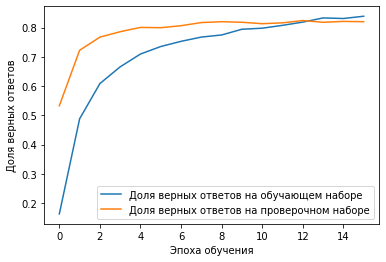

Среднее:  0.7864736095070839
Медиана:  0.8201368451118469
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
144/144 [==============================] - 33s 204ms/step - loss: 5.1205 - accuracy: 0.0711 - val_loss: 2.0347 - val_accuracy: 0.5279
Epoch 2/16
144/144 [==============================] - 29s 204ms/step - loss: 2.2639 - accuracy: 0.4291 - val_loss: 1.1945 - val_accuracy: 0.7067
Epoch 3/16
144/144 [==============================] - 29s 203ms/step - loss: 1.5153 - accuracy: 0.5978 - val_loss: 0.9320 - val_accuracy: 0.7439
Epoch 4/16
144/144 [==============================] - 29s 201ms/step - loss: 1.2329 - accuracy: 0.6577 - val_loss: 0.8057 - val_accuracy: 0.7849
Epoch 5/16
144/144 [==============================] - 29s 202ms/step - loss: 1.0366 - accuracy: 0.7035 - val_loss: 0.7497 - val_accuracy: 0.7977
Epoch 6/16
144/144 [==============================] - 29s 201ms/step - loss: 0.9451 - accuracy: 0.7235 - val_loss: 0.7014 - 

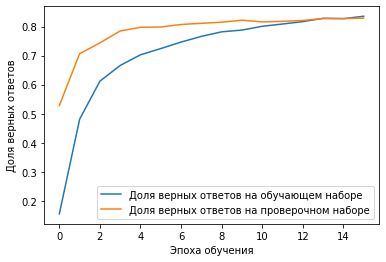

Среднее:  0.7847629487514496
Медиана:  0.8152492642402649
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
144/144 [==============================] - 32s 204ms/step - loss: 5.1123 - accuracy: 0.0689 - val_loss: 2.0455 - val_accuracy: 0.5494
Epoch 2/16
144/144 [==============================] - 29s 201ms/step - loss: 2.2550 - accuracy: 0.4323 - val_loss: 1.2003 - val_accuracy: 0.7107
Epoch 3/16
144/144 [==============================] - 29s 202ms/step - loss: 1.5200 - accuracy: 0.5834 - val_loss: 0.9407 - val_accuracy: 0.7478
Epoch 4/16
144/144 [==============================] - 29s 200ms/step - loss: 1.2126 - accuracy: 0.6579 - val_loss: 0.8146 - val_accuracy: 0.7722
Epoch 5/16
144/144 [==============================] - 29s 202ms/step - loss: 1.0462 - accuracy: 0.6961 - val_loss: 0.7448 - val_accuracy: 0.7898
Epoch 6/16
144/144 [==============================] - 29s 203ms/step - loss: 0.9378 - accuracy: 0.7290 - val_loss: 0.7029 - 

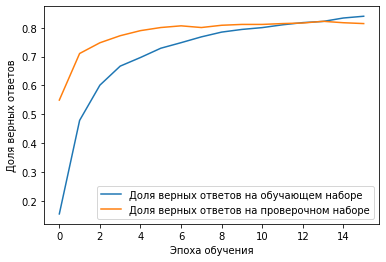

Среднее:  0.7807917892932892
Медиана:  0.80840665102005
0.8188
Точность на всех запусках:  [0.8211, 0.8094, 0.8201, 0.8289, 0.8143]
Среднее значение точности:  0.8188
Амплитуда разброса точности:  0.0196
Среднеквадратичное отклонение точности:  0.006618


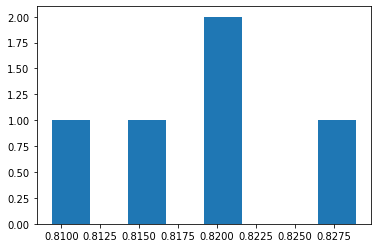

In [ ]:
acc, model = testModel(5, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpaz_q6uh0/assets


INFO:tensorflow:Assets written to: /tmp/tmpaz_q6uh0/assets


In [ ]:
model.save("dogs_breed_ident.pb", save_format="pb")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: dogs_breed_ident.pb/assets


INFO:tensorflow:Assets written to: dogs_breed_ident.pb/assets


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
! tar -cvf archive.tar ./dogs_breed_ident.pb/

./dogs_breed_ident.pb/
./dogs_breed_ident.pb/variables/
./dogs_breed_ident.pb/variables/variables.index
./dogs_breed_ident.pb/variables/variables.data-00000-of-00001
./dogs_breed_ident.pb/saved_model.pb
./dogs_breed_ident.pb/.ipynb_checkpoints/
./dogs_breed_ident.pb/assets/


In [ ]:
from google.colab import files
files.upload()

Saving e4fa31a05213a21bb0aa9006cb29b67a.jpg to e4fa31a05213a21bb0aa9006cb29b67a.jpg


{'e4fa31a05213a21bb0aa9006cb29b67a.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x03\x97\x02\xdf\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\x08\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf7\x01k\xe1\xba],\xa0\x81\x9av\xa8h\xa4E\xd5h;\x1a0hWj\xcca \x97Y\xe4e\x9a\x99\x94\xe9\xf1V\xa6\x14\x0c\xc5Z\x1a\x0c\xedLQ\x8b\xa1D\xc9\xa8\xb1b\xe2J*7%\xb2\xbc\x86J\xc8\xa0WRI\x96\xb9,\xa7\x15\x12\xd5\x10X5b\x10\xd8+\x89$\xcb

In [ ]:
!ls

dogs1  Korgi.jpg     Russkaya-psovaya-borzaya-72-1024x687.jpg
drive  model.tflite  sample_data


In [ ]:
img = image.load_img("Russkaya-psovaya-borzaya-72-1024x687.jpg");

img_1 = image.img_to_array(img)
img_1 = cv2.resize(img_1, (IMAGE_SIZE, IMAGE_SIZE), 
		interpolation = cv2.INTER_AREA)
img_1 = np.expand_dims(img_1, axis=0) / 255.

y_pred = model.predict_on_batch(img_1)

# get 5 best predictions
y_pred_ids = y_pred[0].argsort()[-5:][::-1]
for i in range(len(y_pred_ids)):
	print("\n\t" + map_characters[y_pred_ids[i]]
		+ " (" 
		+ str(y_pred[0][y_pred_ids[i]]) + ")")



	borzoi (0.9446568)

	saluki (0.032463767)

	collie (0.0069457046)

	english_foxhound (0.002229195)

	golden_retriever (0.0021617468)


In [ ]:
!mv model.tflite /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/dogs/

In [ ]:
from google.colab import files
var =files.upload()
filename = list(var.keys())[0]

Saving 15_31.17.04.30_0793_color_1480.jpg to 15_31.17.04.30_0793_color_1480.jpg


pembroke


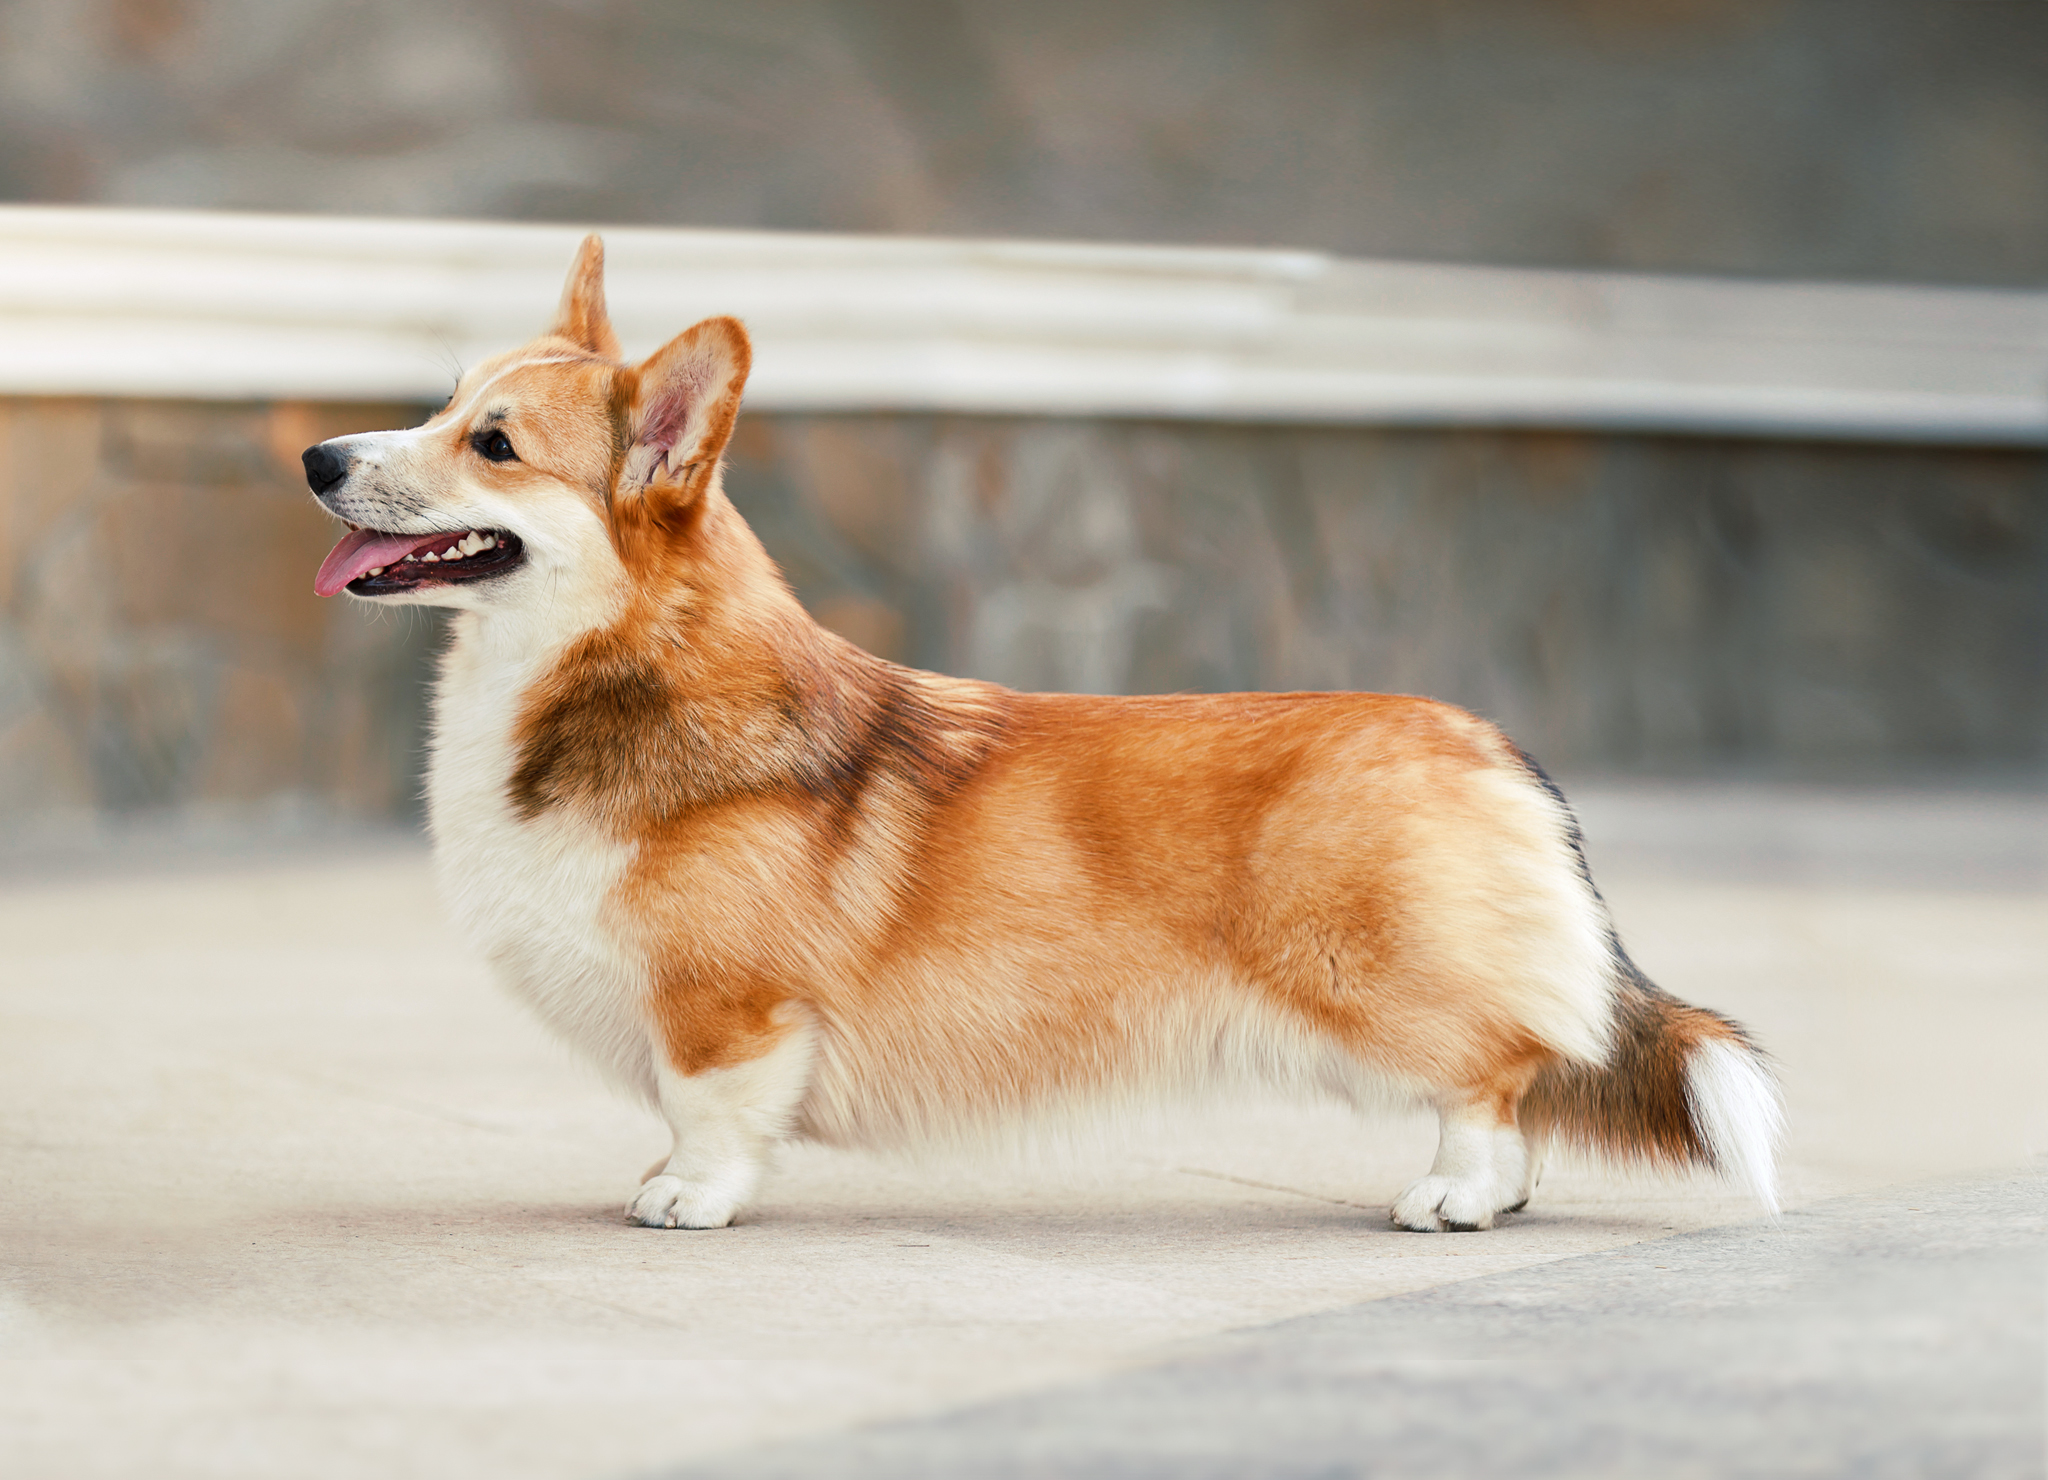

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/dogs/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

img = image.load_img(filename);

img_1 = image.img_to_array(img)
img_1 = cv2.resize(img_1, (IMAGE_SIZE, IMAGE_SIZE), 
		interpolation = cv2.INTER_AREA)
img_1 = np.expand_dims(img_1, axis=0) / 255.

interpreter.set_tensor(input_details[0]['index'], img_1)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(map_characters[list(output_data[0]).index(max(list(output_data[0])))])
Image(filename)

#change size

In [ ]:
BATCH_SIZE = 32
EPOCHS = 16
TESTING_SPLIT=0.1

NUM_CLASSES = 120
IMAGE_SIZE = 224

In [ ]:
working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breed)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  model = Sequential()
  model.add(Conv2D(16, (7, 7), padding='same', 
	use_bias=False, 
	input_shape=INPUT_SHAPE, 
	kernel_regularizer=regularizers.l2(0.001)))
			
  # Note the use of a standard CNN building blocks: 
  # Conv2D - BatchNormalization - Activation
  # MaxPooling2D - Dropout
  # The last two are used to avoid overfitting, also,
  # MaxPooling2D reduces memory use.
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(2, 2), padding='same'))
  model.add(Dropout(0.5))

  model.add(Conv2D(16, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(1, 1), padding='same'))
  model.add(Dropout(0.5))
		  
  model.add(Conv2D(32, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
		  
  model.add(Conv2D(32, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(1, 1), padding='same'))
  model.add(Dropout(0.5))
		  
  model.add(Conv2D(64, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))

  model.add(Conv2D(64, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(1, 1), padding='same'))
  model.add(Dropout(0.5))

  model.add(Conv2D(128, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
	  
  model.add(Conv2D(128, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(1, 1), padding='same'))
  model.add(Dropout(0.5))
		  
  model.add(Conv2D(256, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
		  
  model.add(Conv2D(256, (3, 3), padding='same', 
	use_bias=False, 
	kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=3, scale=False))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), 
	strides=(1, 1), padding='same'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(OUTPUT_SHAPE, activation='softmax', 
	kernel_regularizer=regularizers.l2(0.01))) 
  model.add(Activation("relu"))
  model.add(Dense(OUTPUT_SHAPE, activation='softmax', 
	kernel_regularizer=regularizers.l2(0.01)))
		  
  model.compile(optimizer='adam', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])

  return model

def testModel(iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = create_model()
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

9199 train ids 1023 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


In [ ]:
acc, model = testModel(5, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

TypeError: ignored

#Creating model

---



In [ ]:
def createModelInceptionV3():
#  model.layers[0].trainable = False
#  model.compile(optimizer='sgd', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 

  base_model = InceptionV3(weights = 'imagenet', 
	include_top = False, 
	input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  
  predictions = Dense(NUM_CLASSES, 
	activation='softmax')(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
	  layer.trainable = False

#  model.compile(optimizer='adam', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
		  
  #model.summary()      
		  
  return(model)

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/15
63/63 [==============================] - 40s 642ms/step - loss: 4.3163 - accuracy: 0.1320 - val_loss: 3.5879 - val_accuracy: 0.3635
Epoch 2/15
63/63 [==============================] - 37s 585ms/step - loss: 2.9263 - accuracy: 0.5393 - val_loss: 2.3532 - val_accuracy: 0.6485
Epoch 3/15
63/63 [==============================] - 38s 596ms/step - loss: 1.8574 - accuracy: 0.7065 - val_loss: 1.5608 - val_accuracy: 0.7335
Epoch 4/15
63/63 [==============================] - 32s 504ms/step - loss: 1.2756 - accuracy: 0.7696 - val_loss: 1.1885 - val_accuracy: 0.7535
Epoch 5/15
63/63 [==============================] - 29s 463ms/step - loss: 1.0003 - accuracy: 0.7900 - val_loss: 0.9990 - val_accuracy: 0.7720
Epoch 6/15
63/63 [==============================] - 29s 464ms/step - loss: 0.8519 - accuracy: 0.8080 - val_loss: 0.8961 - val_accuracy: 0.7805
Epoch 7/15
63/63 [==============================] - 29s 462ms/step - loss: 0.

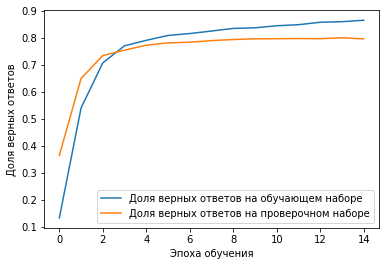

Среднее:  0.7463666637738545
Медиана:  0.7889999747276306


In [ ]:
model = createModelInceptionV3()
history = model.fit(x=train_data, epochs=15, validation_data=val_data, verbose=1, validation_freq=1)
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
print("Среднее: ", sum(history.history['val_accuracy'])/15)
print("Медиана: ", (history.history['val_accuracy'][7]))

# First gen

{epochs: 30, batch:128, train/val:70/30, optimizer: sgd} 
loss: 0.3428 - accuracy: 0.9109 - val_loss: 0.6549 - val_accuracy: 0.8000

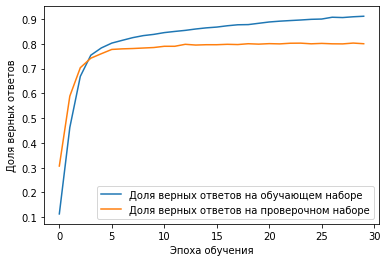

{epochs: 30, batch:128, train/val:70/30, optimizer: adamax} loss: 0.0133 - accuracy: 0.9996 - val_loss: 0.8545 - val_accuracy: 0.7887

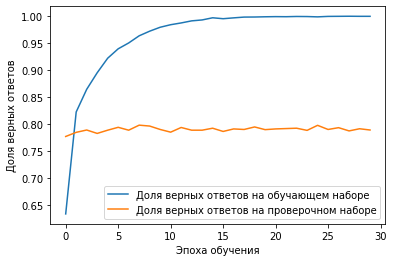

{epochs: 30, batch:128, train/val:70/30, optimizer: adagrad} loss: 0.6773 - accuracy: 0.8400 - val_loss: 0.8135 - val_accuracy: 0.7883

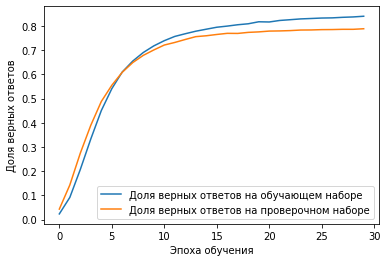

{epochs: 30, batch:128, train/val:70/30, optimizer: RMSprop} loss: 0.0435 - accuracy: 0.9904 - val_loss: 1.6315 - val_accuracy: 0.7810

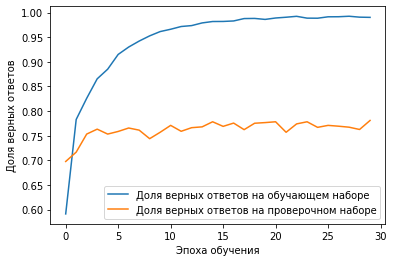

{epochs: 30, batch:128, train/val:70/30, optimizer: adam} loss: 0.1134 - accuracy: 0.9626 - val_loss: 1.2531 - val_accuracy: 0.7597

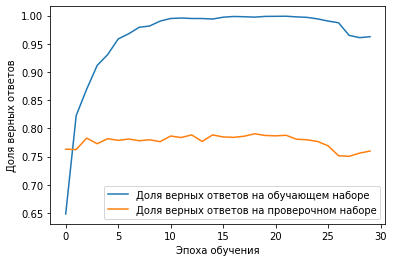

{epochs: 100, batch:128, train/val:70/30, optimizer: adadelta} loss: 1.8983 - accuracy: 0.7169 - val_loss: 1.9834 - val_accuracy: 0.6907

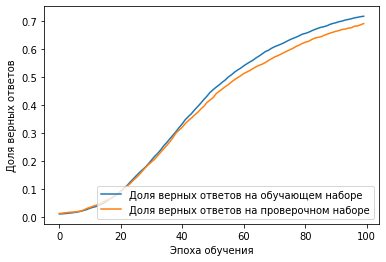

{epochs: 30, batch:128, train/val:70/30, optimizer: adadelta} loss: 4.0373 - accuracy: 0.1911 - val_loss: 4.0748 - val_accuracy: 0.1793

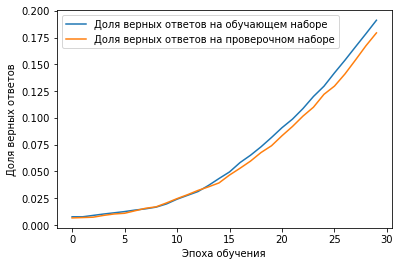

{epochs: 30, batch:128, train/val:70/30, optimizer: nadam} loss: 0.0074 - accuracy: 0.9984 - val_loss: 1.3387 - val_accuracy: 0.7643

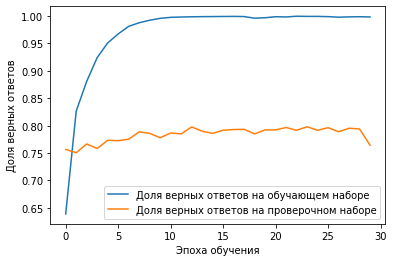

{epochs: 30, batch:128, train/val:70/30, optimizer: ftrl} loss: 4.7865 - accuracy: 0.0117 - val_loss: 4.7869 - val_accuracy: 0.0087

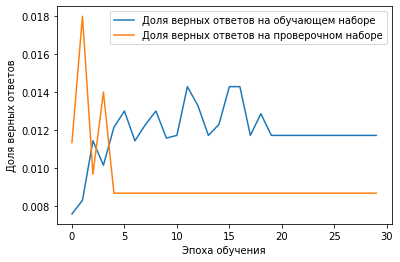

# Second gen

{epochs: 30, batch:16, train/val:80/20, optimizer: sgd} loss: 0.0430 - accuracy: 0.9977 - val_loss: 0.7625 - val_accuracy: 0.7960
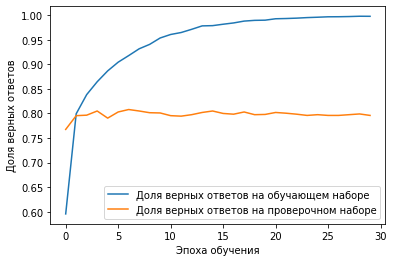
Среднее:  0.7981333335240682
Медиана:  0.8025000095367432


{epochs: 30, batch:32, train/val:70/30, optimizer: sgd} loss: 0.1002 - accuracy: 0.9874 - val_loss: 0.7018 - val_accuracy: 0.7903
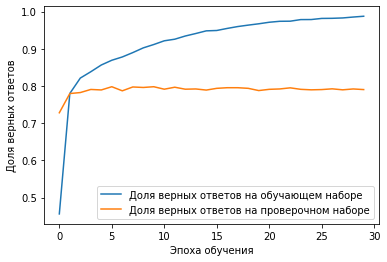
Среднее:  0.7895222167174022
Медиана:  0.7913333177566528


{epochs: 15, batch:16, train/val:80/20, optimizer: sgd} loss: 0.1142 - accuracy: 0.9801 - val_loss: 0.7150 - val_accuracy: 0.7970
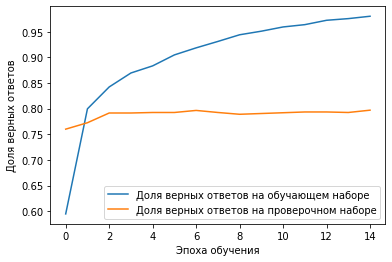
Среднее:  0.7891666650772095
Медиана:  0.7925000190734863


{epochs: 30, batch:16, train/val:70/30, optimizer: sgd} loss: 0.0420 - accuracy: 0.9986 - val_loss: 0.7717 - val_accuracy: 0.7910
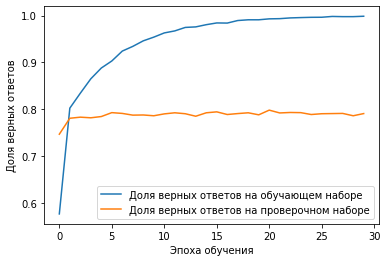
Среднее:  0.788266662756602
Медиана:  0.793666660785675


{epochs: 30, batch:64, train/val:70/30, optimizer: sgd} loss: 0.2033 - accuracy: 0.9564 - val_loss: 0.6640 - val_accuracy: 0.7990

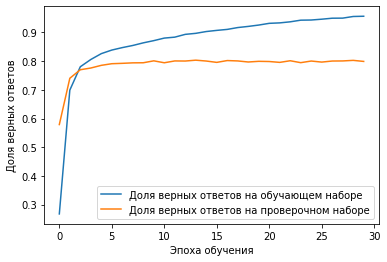

Среднее:  0.7868444482485454
Медиана:  0.8003333508968353

{epochs: 15, batch:128, train/val:80/20, optimizer: sgd} loss: 0.5030 - accuracy: 0.8644 - val_loss: 0.6938 - val_accuracy: 0.7955
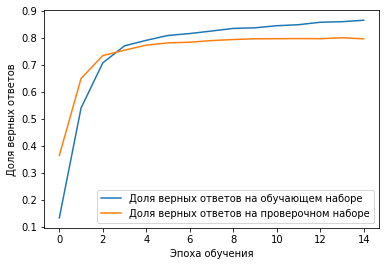
Среднее:  0.7463666637738545
Медиана:  0.7889999747276306


{epochs: 30, batch:256, train/val:70/30, optimizer: sgd} loss: 0.5035 - accuracy: 0.8670 - val_loss: 0.6992 - val_accuracy: 0.7940
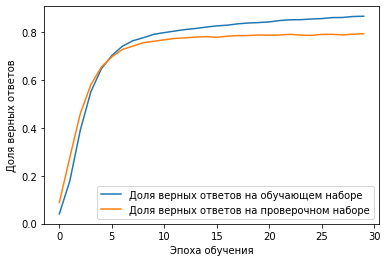
Среднее:  0.7150111109018326
Медиана:  0.7803333401679993


# New Net

In [ ]:
BATCH_SIZE = 128
EPOCHS = 15
TESTING_SPLIT=0.2	

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = 10000

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

8177 train ids 2045 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


In [ ]:
def createNet(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  neoronsL1 = neoronsL1
  base_model = InceptionV3(weights = 'imagenet', 
	include_top = False, 
	input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(neoronsL1, activation=innerActivation)(x)

  predictions = Dense(NUM_CLASSES, 
	activation=outputActivation)(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
	  layer.trainable = False

#  model.compile(optimizer='adam', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
  
  #Возвращаем созданную сеть
  return model

def testModel(net, iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNet(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/15)
    print("Медиана: ", (history.history['val_accuracy'][7]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/15
63/63 [==============================] - 52s 645ms/step - loss: 4.7349 - accuracy: 0.0440 - val_loss: 3.7212 - val_accuracy: 0.3330
Epoch 2/15
63/63 [==============================] - 38s 605ms/step - loss: 3.3352 - accuracy: 0.4399 - val_loss: 2.4920 - val_accuracy: 0.6065
Epoch 3/15
63/63 [==============================] - 39s 618ms/step - loss: 2.1676 - accuracy: 0.6711 - val_loss: 1.6402 - val_accuracy: 0.7310
Epoch 4/15
63/63 [==============================] - 33s 516ms/step - loss: 1.4219 - accuracy: 0.7529 - val_loss: 1.2294 - val_accuracy: 0.7660
Epoch 5/15
63/63 [==============================] - 36s 574ms/step - loss: 1.0711 - accuracy: 0.7894 - val_loss: 1.0180 - val_accuracy: 0.7790
Epoch 6/15
63/63 [==============================] - 39s 620ms/step - loss: 0.9080 - accuracy: 0.7992 - val_loss: 0.9105 - val_accuracy: 0.7910
Epoch 7/15
63/63 [==============================] - 39s 618ms/step - loss: 0.

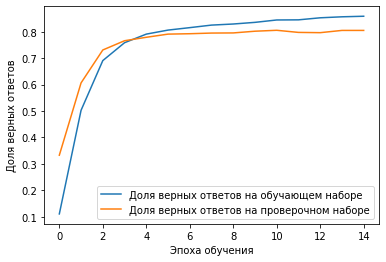

Среднее:  0.7467333356539408
Медиана:  0.7950000166893005
Epoch 1/15
63/63 [==============================] - 33s 465ms/step - loss: 4.7319 - accuracy: 0.0512 - val_loss: 3.6615 - val_accuracy: 0.3505
Epoch 2/15
63/63 [==============================] - 29s 452ms/step - loss: 3.3087 - accuracy: 0.4552 - val_loss: 2.4353 - val_accuracy: 0.6325
Epoch 3/15
63/63 [==============================] - 29s 458ms/step - loss: 2.1392 - accuracy: 0.6790 - val_loss: 1.6053 - val_accuracy: 0.7360
Epoch 4/15
63/63 [==============================] - 28s 449ms/step - loss: 1.4109 - accuracy: 0.7524 - val_loss: 1.2042 - val_accuracy: 0.7625
Epoch 5/15
63/63 [==============================] - 29s 453ms/step - loss: 1.0681 - accuracy: 0.7906 - val_loss: 1.0141 - val_accuracy: 0.7745
Epoch 6/15
63/63 [==============================] - 28s 448ms/step - loss: 0.9068 - accuracy: 0.7951 - val_loss: 0.9073 - val_accuracy: 0.7865
Epoch 7/15
63/63 [==============================] - 28s 449ms/step - loss: 0.7952 - 

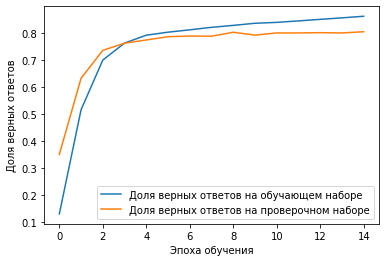

Среднее:  0.7482333262761434
Медиана:  0.7885000109672546
Epoch 1/15
63/63 [==============================] - 34s 473ms/step - loss: 4.7583 - accuracy: 0.0442 - val_loss: 3.7076 - val_accuracy: 0.3055
Epoch 2/15
63/63 [==============================] - 29s 456ms/step - loss: 3.3528 - accuracy: 0.4334 - val_loss: 2.4794 - val_accuracy: 0.6065
Epoch 3/15
63/63 [==============================] - 29s 458ms/step - loss: 2.1647 - accuracy: 0.6748 - val_loss: 1.6389 - val_accuracy: 0.7205
Epoch 4/15
63/63 [==============================] - 29s 459ms/step - loss: 1.4253 - accuracy: 0.7559 - val_loss: 1.2268 - val_accuracy: 0.7495
Epoch 5/15
63/63 [==============================] - 29s 457ms/step - loss: 1.0733 - accuracy: 0.7802 - val_loss: 1.0202 - val_accuracy: 0.7780
Epoch 6/15
63/63 [==============================] - 29s 462ms/step - loss: 0.8851 - accuracy: 0.8046 - val_loss: 0.9102 - val_accuracy: 0.7860
Epoch 7/15
63/63 [==============================] - 29s 461ms/step - loss: 0.7804 - 

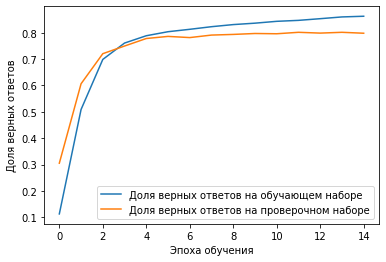

Среднее:  0.7403000017007192
Медиана:  0.7910000085830688
Epoch 1/15
63/63 [==============================] - 35s 490ms/step - loss: 4.6668 - accuracy: 0.0596 - val_loss: 3.6234 - val_accuracy: 0.3835
Epoch 2/15
63/63 [==============================] - 30s 479ms/step - loss: 3.2655 - accuracy: 0.4731 - val_loss: 2.4074 - val_accuracy: 0.6320
Epoch 3/15
63/63 [==============================] - 30s 479ms/step - loss: 2.1055 - accuracy: 0.6788 - val_loss: 1.6083 - val_accuracy: 0.7220
Epoch 4/15
63/63 [==============================] - 30s 473ms/step - loss: 1.3789 - accuracy: 0.7638 - val_loss: 1.2085 - val_accuracy: 0.7570
Epoch 5/15
63/63 [==============================] - 30s 479ms/step - loss: 1.0370 - accuracy: 0.7934 - val_loss: 1.0124 - val_accuracy: 0.7750
Epoch 6/15
63/63 [==============================] - 30s 475ms/step - loss: 0.8874 - accuracy: 0.8042 - val_loss: 0.9087 - val_accuracy: 0.7885
Epoch 7/15
63/63 [==============================] - 30s 473ms/step - loss: 0.7994 - 

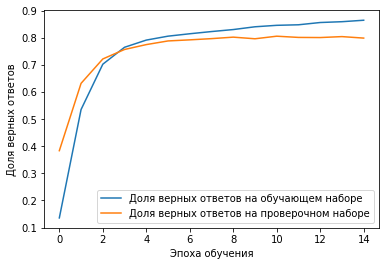

Среднее:  0.75056667526563
Медиана:  0.796999990940094
Epoch 1/15
63/63 [==============================] - 34s 488ms/step - loss: 4.7220 - accuracy: 0.0516 - val_loss: 3.7015 - val_accuracy: 0.3290
Epoch 2/15
63/63 [==============================] - 31s 484ms/step - loss: 3.3302 - accuracy: 0.4409 - val_loss: 2.4816 - val_accuracy: 0.6155
Epoch 3/15
63/63 [==============================] - 30s 481ms/step - loss: 2.1637 - accuracy: 0.6793 - val_loss: 1.6400 - val_accuracy: 0.7205
Epoch 4/15
63/63 [==============================] - 30s 476ms/step - loss: 1.4212 - accuracy: 0.7639 - val_loss: 1.2214 - val_accuracy: 0.7610
Epoch 5/15
63/63 [==============================] - 30s 477ms/step - loss: 1.0617 - accuracy: 0.7989 - val_loss: 1.0185 - val_accuracy: 0.7720
Epoch 6/15
63/63 [==============================] - 30s 474ms/step - loss: 0.9014 - accuracy: 0.8059 - val_loss: 0.9117 - val_accuracy: 0.7875
Epoch 7/15
63/63 [==============================] - 30s 477ms/step - loss: 0.7832 - acc

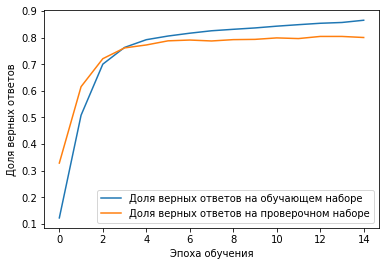

Среднее:  0.7433666666348775
Медиана:  0.7870000004768372
Epoch 1/15
63/63 [==============================] - 36s 508ms/step - loss: 4.7932 - accuracy: 0.0510 - val_loss: 3.7368 - val_accuracy: 0.3180
Epoch 2/15
63/63 [==============================] - 31s 490ms/step - loss: 3.3568 - accuracy: 0.4226 - val_loss: 2.4962 - val_accuracy: 0.5980
Epoch 3/15
63/63 [==============================] - 31s 494ms/step - loss: 2.1495 - accuracy: 0.6580 - val_loss: 1.6444 - val_accuracy: 0.7165
Epoch 4/15
63/63 [==============================] - 31s 494ms/step - loss: 1.4231 - accuracy: 0.7497 - val_loss: 1.2170 - val_accuracy: 0.7505
Epoch 5/15
63/63 [==============================] - 31s 497ms/step - loss: 1.0772 - accuracy: 0.7870 - val_loss: 1.0139 - val_accuracy: 0.7740
Epoch 6/15
63/63 [==============================] - 31s 491ms/step - loss: 0.8962 - accuracy: 0.7927 - val_loss: 0.9024 - val_accuracy: 0.7800
Epoch 7/15
63/63 [==============================] - 31s 488ms/step - loss: 0.7827 - 

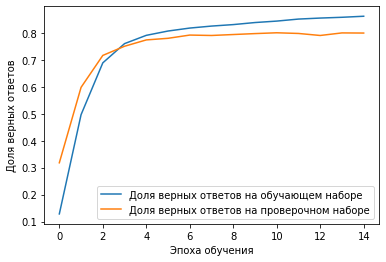

Среднее:  0.7399666607379913
Медиана:  0.7904999852180481
Epoch 1/15
63/63 [==============================] - 35s 502ms/step - loss: 4.7533 - accuracy: 0.0486 - val_loss: 3.7240 - val_accuracy: 0.3170
Epoch 2/15
63/63 [==============================] - 31s 487ms/step - loss: 3.3454 - accuracy: 0.4348 - val_loss: 2.4957 - val_accuracy: 0.6065
Epoch 3/15
63/63 [==============================] - 31s 488ms/step - loss: 2.1389 - accuracy: 0.6731 - val_loss: 1.6574 - val_accuracy: 0.7275
Epoch 4/15
63/63 [==============================] - 31s 486ms/step - loss: 1.4258 - accuracy: 0.7622 - val_loss: 1.2335 - val_accuracy: 0.7610
Epoch 5/15
63/63 [==============================] - 31s 484ms/step - loss: 1.0770 - accuracy: 0.7880 - val_loss: 1.0307 - val_accuracy: 0.7665
Epoch 6/15
63/63 [==============================] - 31s 486ms/step - loss: 0.8698 - accuracy: 0.8108 - val_loss: 0.9177 - val_accuracy: 0.7800
Epoch 7/15
63/63 [==============================] - 31s 486ms/step - loss: 0.8120 - 

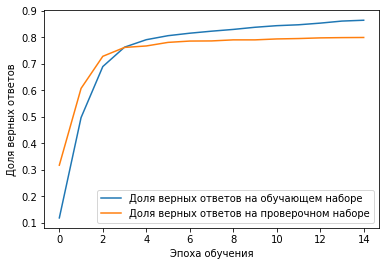

Среднее:  0.7392666637897491
Медиана:  0.7854999899864197
Epoch 1/15
63/63 [==============================] - 36s 513ms/step - loss: 4.6971 - accuracy: 0.0578 - val_loss: 3.6343 - val_accuracy: 0.3375
Epoch 2/15
63/63 [==============================] - 31s 491ms/step - loss: 3.2393 - accuracy: 0.4588 - val_loss: 2.4046 - val_accuracy: 0.6205
Epoch 3/15
63/63 [==============================] - 31s 487ms/step - loss: 2.0702 - accuracy: 0.6787 - val_loss: 1.6062 - val_accuracy: 0.7210
Epoch 4/15
63/63 [==============================] - 31s 494ms/step - loss: 1.3845 - accuracy: 0.7556 - val_loss: 1.2075 - val_accuracy: 0.7595
Epoch 5/15
63/63 [==============================] - 31s 487ms/step - loss: 1.0511 - accuracy: 0.7878 - val_loss: 1.0159 - val_accuracy: 0.7660
Epoch 6/15
63/63 [==============================] - 31s 491ms/step - loss: 0.8895 - accuracy: 0.8014 - val_loss: 0.9186 - val_accuracy: 0.7780
Epoch 7/15
63/63 [==============================] - 31s 490ms/step - loss: 0.7887 - 

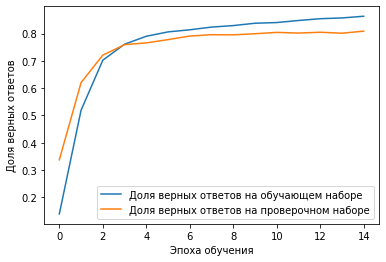

Среднее:  0.745766669511795
Медиана:  0.7960000038146973
Epoch 1/15
63/63 [==============================] - 36s 509ms/step - loss: 4.6091 - accuracy: 0.0667 - val_loss: 3.5181 - val_accuracy: 0.3775
Epoch 2/15
63/63 [==============================] - 31s 487ms/step - loss: 3.1481 - accuracy: 0.4837 - val_loss: 2.2816 - val_accuracy: 0.6370
Epoch 3/15
63/63 [==============================] - 30s 481ms/step - loss: 1.9911 - accuracy: 0.6911 - val_loss: 1.5268 - val_accuracy: 0.7270
Epoch 4/15
63/63 [==============================] - 30s 480ms/step - loss: 1.3360 - accuracy: 0.7607 - val_loss: 1.1729 - val_accuracy: 0.7575
Epoch 5/15
63/63 [==============================] - 30s 472ms/step - loss: 1.0303 - accuracy: 0.7852 - val_loss: 0.9892 - val_accuracy: 0.7770
Epoch 6/15
63/63 [==============================] - 29s 462ms/step - loss: 0.8628 - accuracy: 0.8009 - val_loss: 0.9006 - val_accuracy: 0.7870
Epoch 7/15
63/63 [==============================] - 30s 468ms/step - loss: 0.7729 - a

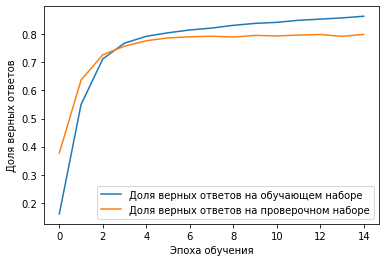

Среднее:  0.7476666728655498
Медиана:  0.7929999828338623
Epoch 1/15
63/63 [==============================] - 33s 474ms/step - loss: 4.7539 - accuracy: 0.0435 - val_loss: 3.7046 - val_accuracy: 0.3335
Epoch 2/15
63/63 [==============================] - 29s 459ms/step - loss: 3.3252 - accuracy: 0.4505 - val_loss: 2.4504 - val_accuracy: 0.6310
Epoch 3/15
63/63 [==============================] - 29s 456ms/step - loss: 2.1533 - accuracy: 0.6790 - val_loss: 1.6136 - val_accuracy: 0.7290
Epoch 4/15
63/63 [==============================] - 29s 454ms/step - loss: 1.4098 - accuracy: 0.7598 - val_loss: 1.2019 - val_accuracy: 0.7660
Epoch 5/15
63/63 [==============================] - 29s 462ms/step - loss: 1.0715 - accuracy: 0.7901 - val_loss: 1.0063 - val_accuracy: 0.7745
Epoch 6/15
63/63 [==============================] - 29s 455ms/step - loss: 0.8953 - accuracy: 0.8014 - val_loss: 0.8988 - val_accuracy: 0.7855
Epoch 7/15
63/63 [==============================] - 29s 454ms/step - loss: 0.8073 - 

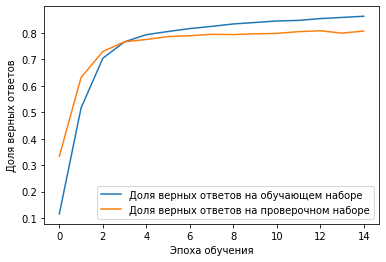

Среднее:  0.7470000008742015
Медиана:  0.7940000295639038
Epoch 1/15
63/63 [==============================] - 33s 472ms/step - loss: 4.7016 - accuracy: 0.0482 - val_loss: 3.6703 - val_accuracy: 0.3415
Epoch 2/15
63/63 [==============================] - 29s 457ms/step - loss: 3.2984 - accuracy: 0.4525 - val_loss: 2.4288 - val_accuracy: 0.6410
Epoch 3/15
63/63 [==============================] - 29s 456ms/step - loss: 2.1023 - accuracy: 0.6938 - val_loss: 1.5978 - val_accuracy: 0.7315
Epoch 4/15
63/63 [==============================] - 29s 460ms/step - loss: 1.3907 - accuracy: 0.7575 - val_loss: 1.1919 - val_accuracy: 0.7645
Epoch 5/15
63/63 [==============================] - 29s 459ms/step - loss: 1.0674 - accuracy: 0.7832 - val_loss: 1.0033 - val_accuracy: 0.7800
Epoch 6/15
63/63 [==============================] - 29s 457ms/step - loss: 0.8891 - accuracy: 0.8087 - val_loss: 0.8993 - val_accuracy: 0.7770
Epoch 7/15
63/63 [==============================] - 29s 461ms/step - loss: 0.7840 - 

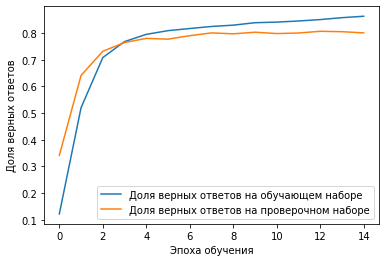

Среднее:  0.7490666647752126
Медиана:  0.8004999756813049
Epoch 1/15
63/63 [==============================] - 33s 472ms/step - loss: 4.7525 - accuracy: 0.0467 - val_loss: 3.7210 - val_accuracy: 0.3115
Epoch 2/15
63/63 [==============================] - 29s 454ms/step - loss: 3.3525 - accuracy: 0.4313 - val_loss: 2.4617 - val_accuracy: 0.6190
Epoch 3/15
63/63 [==============================] - 29s 458ms/step - loss: 2.1210 - accuracy: 0.6813 - val_loss: 1.6172 - val_accuracy: 0.7205
Epoch 4/15
63/63 [==============================] - 29s 457ms/step - loss: 1.4023 - accuracy: 0.7562 - val_loss: 1.2039 - val_accuracy: 0.7625
Epoch 5/15
63/63 [==============================] - 29s 456ms/step - loss: 1.0635 - accuracy: 0.7877 - val_loss: 1.0106 - val_accuracy: 0.7720
Epoch 6/15
63/63 [==============================] - 29s 455ms/step - loss: 0.8914 - accuracy: 0.8042 - val_loss: 0.9070 - val_accuracy: 0.7780
Epoch 7/15
63/63 [==============================] - 29s 457ms/step - loss: 0.7946 - 

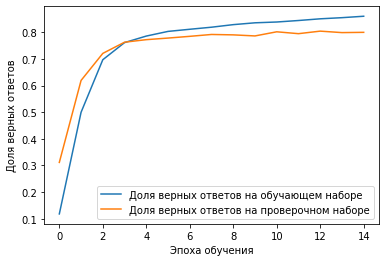

Среднее:  0.7409000039100647
Медиана:  0.7914999723434448
Epoch 1/15
63/63 [==============================] - 34s 471ms/step - loss: 4.7887 - accuracy: 0.0508 - val_loss: 3.7366 - val_accuracy: 0.3220
Epoch 2/15
63/63 [==============================] - 29s 460ms/step - loss: 3.3676 - accuracy: 0.4467 - val_loss: 2.5406 - val_accuracy: 0.6250
Epoch 3/15
63/63 [==============================] - 29s 453ms/step - loss: 2.1876 - accuracy: 0.6822 - val_loss: 1.6833 - val_accuracy: 0.7165
Epoch 4/15
63/63 [==============================] - 29s 455ms/step - loss: 1.4729 - accuracy: 0.7389 - val_loss: 1.2641 - val_accuracy: 0.7450
Epoch 5/15
63/63 [==============================] - 29s 454ms/step - loss: 1.1087 - accuracy: 0.7834 - val_loss: 1.0437 - val_accuracy: 0.7705
Epoch 6/15
63/63 [==============================] - 29s 453ms/step - loss: 0.9142 - accuracy: 0.7980 - val_loss: 0.9325 - val_accuracy: 0.7715
Epoch 7/15
63/63 [==============================] - 29s 455ms/step - loss: 0.8033 - 

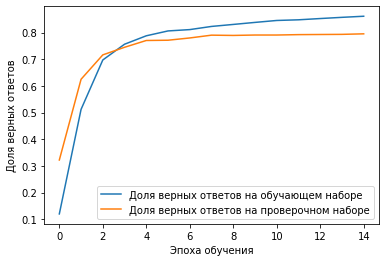

Среднее:  0.737799996137619
Медиана:  0.7904999852180481
Epoch 1/15
63/63 [==============================] - 33s 470ms/step - loss: 4.6473 - accuracy: 0.0655 - val_loss: 3.6178 - val_accuracy: 0.3525
Epoch 2/15
63/63 [==============================] - 29s 451ms/step - loss: 3.2494 - accuracy: 0.4658 - val_loss: 2.3842 - val_accuracy: 0.6255
Epoch 3/15
63/63 [==============================] - 29s 453ms/step - loss: 2.0659 - accuracy: 0.6860 - val_loss: 1.5717 - val_accuracy: 0.7285
Epoch 4/15
63/63 [==============================] - 29s 454ms/step - loss: 1.3734 - accuracy: 0.7584 - val_loss: 1.1842 - val_accuracy: 0.7600
Epoch 5/15
63/63 [==============================] - 29s 455ms/step - loss: 1.0471 - accuracy: 0.7892 - val_loss: 0.9962 - val_accuracy: 0.7780
Epoch 6/15
63/63 [==============================] - 29s 456ms/step - loss: 0.8676 - accuracy: 0.8048 - val_loss: 0.8924 - val_accuracy: 0.7870
Epoch 7/15
63/63 [==============================] - 29s 455ms/step - loss: 0.7858 - a

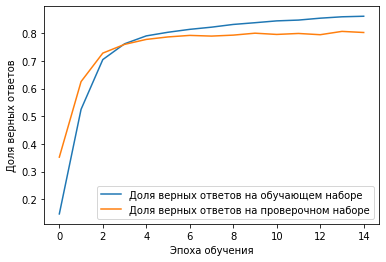

Среднее:  0.7472333331902822
Медиана:  0.7900000214576721
Epoch 1/15
63/63 [==============================] - 33s 469ms/step - loss: 4.6792 - accuracy: 0.0547 - val_loss: 3.6437 - val_accuracy: 0.3235
Epoch 2/15
63/63 [==============================] - 29s 458ms/step - loss: 3.2763 - accuracy: 0.4397 - val_loss: 2.4043 - val_accuracy: 0.6145
Epoch 3/15
63/63 [==============================] - 28s 447ms/step - loss: 2.0929 - accuracy: 0.6740 - val_loss: 1.5967 - val_accuracy: 0.7240
Epoch 4/15
63/63 [==============================] - 29s 455ms/step - loss: 1.3926 - accuracy: 0.7640 - val_loss: 1.1979 - val_accuracy: 0.7580
Epoch 5/15
63/63 [==============================] - 28s 447ms/step - loss: 1.0596 - accuracy: 0.7905 - val_loss: 1.0031 - val_accuracy: 0.7785
Epoch 6/15
63/63 [==============================] - 28s 447ms/step - loss: 0.8826 - accuracy: 0.8062 - val_loss: 0.9007 - val_accuracy: 0.7830
Epoch 7/15
63/63 [==============================] - 28s 445ms/step - loss: 0.7990 - 

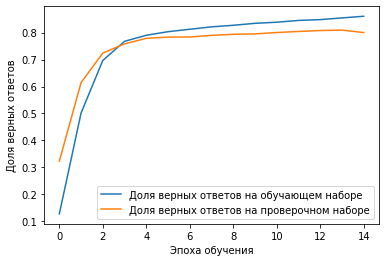

Среднее:  0.7442333400249481
Медиана:  0.7894999980926514
Epoch 1/15
63/63 [==============================] - 33s 459ms/step - loss: 4.7300 - accuracy: 0.0419 - val_loss: 3.7235 - val_accuracy: 0.3105
Epoch 2/15
63/63 [==============================] - 28s 439ms/step - loss: 3.3314 - accuracy: 0.4311 - val_loss: 2.5134 - val_accuracy: 0.6110
Epoch 3/15
63/63 [==============================] - 28s 441ms/step - loss: 2.1661 - accuracy: 0.6763 - val_loss: 1.6645 - val_accuracy: 0.7145
Epoch 4/15
63/63 [==============================] - 28s 442ms/step - loss: 1.4392 - accuracy: 0.7527 - val_loss: 1.2462 - val_accuracy: 0.7510
Epoch 5/15
63/63 [==============================] - 28s 439ms/step - loss: 1.0677 - accuracy: 0.7959 - val_loss: 1.0434 - val_accuracy: 0.7655
Epoch 6/15
63/63 [==============================] - 28s 441ms/step - loss: 0.8895 - accuracy: 0.8016 - val_loss: 0.9183 - val_accuracy: 0.7815
Epoch 7/15
63/63 [==============================] - 28s 441ms/step - loss: 0.7828 - 

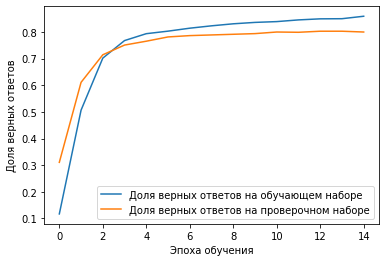

Среднее:  0.7399999956289928
Медиана:  0.7889999747276306
[512, 0, 0, 'relu', 'softmax'] 0.8012
Точность на всех запусках:  [0.805, 0.805, 0.798, 0.799, 0.8, 0.7995, 0.7985, 0.809, 0.7995, 0.8065, 0.8005, 0.7995, 0.7955, 0.803, 0.8, 0.8]
Среднее значение точности:  0.8012
Амплитуда разброса точности:  0.0135
Среднеквадратичное отклонение точности:  0.00344


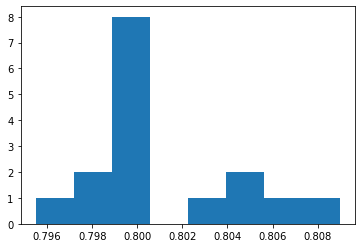

In [ ]:
net = [512, 0, 0, 'relu', 'softmax']
acc, model = testModel(net, 16, verb=1)
print(net, round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

# --- Test

j = 0

# Final cycle performs testing on the entire
# testing set. 
for file_name in os.listdir("dogs1/test/"):
	img = image.load_img("dogs1/test/" + file_name);

	img_1 = image.img_to_array(img)
	img_1 = cv2.resize(img_1, (IMAGE_SIZE, IMAGE_SIZE), 
		interpolation = cv2.INTER_AREA)
	img_1 = np.expand_dims(img_1, axis=0) / 255.

	y_pred = model.predict_on_batch(img_1)

	# get 5 best predictions
	y_pred_ids = y_pred[0].argsort()[-5:][::-1]

	print(file_name)
	for i in range(len(y_pred_ids)):
		print("\n\t" + map_characters[y_pred_ids[i]]
			+ " (" 
			+ str(y_pred[0][y_pred_ids[i]]) + ")")

	print("--------------------\n")

###[512, 0, 0, 'relu', 'softmax'] 0.8028
Точность на всех запусках:  [0.8115, 0.7975, 0.801, 0.794, 0.8035, 0.799, 0.8095, 0.798, 0.8105, 0.796, 0.801, 0.809, 0.7995, 0.8105, 0.804, 0.7955, 0.8005, 0.8045, 0.8055, 0.8055]

Среднее значение точности:  0.8028

Амплитуда разброса точности:  0.0175

Среднеквадратичное отклонение точности:  0.005302

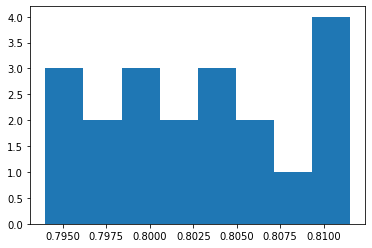


###[512, 0, 0, 'relu', 'sigmoid'] 0.7959
Точность на всех запусках:  [0.785, 0.7975, 0.7925, 0.8055, 0.7855, 0.786, 0.7945, 0.802, 0.8035, 0.7915, 0.7965, 0.801, 0.7935, 0.787, 0.7965, 0.798, 0.7995, 0.799, 0.805, 0.7975]

Среднее значение точности:  0.7959

Амплитуда разброса точности:  0.0205

Среднеквадратичное отклонение точности:  0.006211

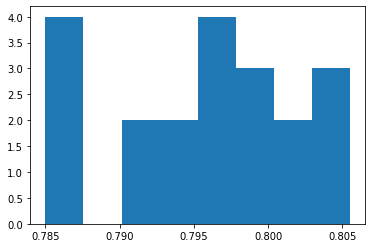


###[512, 0, 0, 'sigmoid', 'softmax'] 0.6987
Точность на всех запусках:  [0.696, 0.7035, 0.6875, 0.689, 0.7, 0.7, 0.702, 0.7035, 0.716, 0.695, 0.694, 0.707, 0.7025, 0.702, 0.6825, 0.6935, 0.695, 0.703, 0.705, 0.6975]

Среднее значение точности:  0.6987

Амплитуда разброса точности:  0.0335

Среднеквадратичное отклонение точности:  0.007346

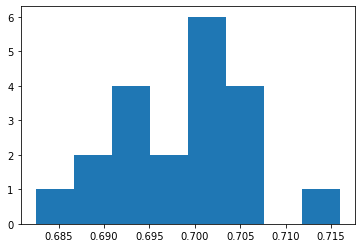

# Add Dropout

In [ ]:
BATCH_SIZE = 128
EPOCHS = 15
TESTING_SPLIT=0.2	

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = 10000

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

8177 train ids 2045 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


In [ ]:
def createNetDrop(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  neoronsL1 = neoronsL1
  base_model = InceptionV3(weights = 'imagenet', 
	include_top = False, 
	input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(neoronsL1, activation=innerActivation)(x)

  x = Dropout(0.25)(x)

  predictions = Dense(NUM_CLASSES, 
	activation=outputActivation)(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
	  layer.trainable = False

#  model.compile(optimizer='adam', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
  
  #Возвращаем созданную сеть
  return model

def testModel(net, iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNetDrop(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/15)
    print("Медиана: ", (history.history['val_accuracy'][7]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc

87916544/87910968 [==============================] - 0s 0us/step


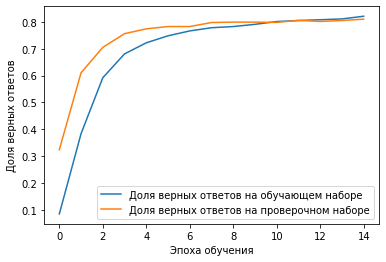

Среднее:  0.7433333357175191
Медиана:  0.7975000143051147


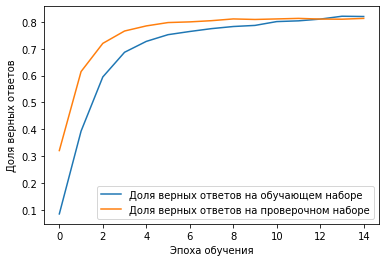

Среднее:  0.7524333417415618
Медиана:  0.8044999837875366


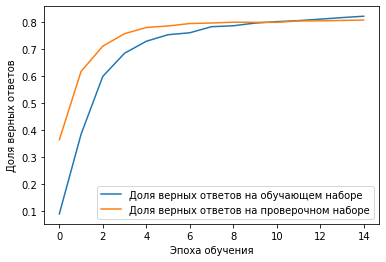

Среднее:  0.7479333360989888
Медиана:  0.7960000038146973


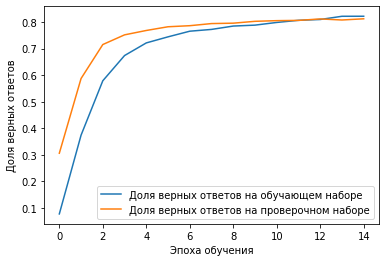

Среднее:  0.7424333254496257
Медиана:  0.7944999933242798


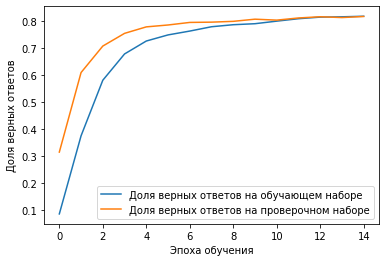

Среднее:  0.7472333312034607
Медиана:  0.7960000038146973


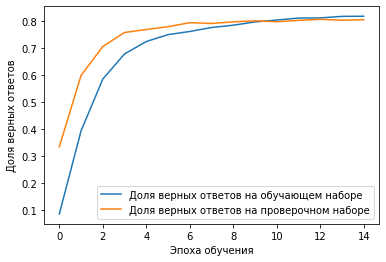

Среднее:  0.7435999949773152
Медиана:  0.7919999957084656


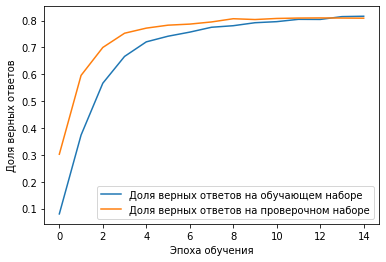

Среднее:  0.7430333375930787
Медиана:  0.7950000166893005


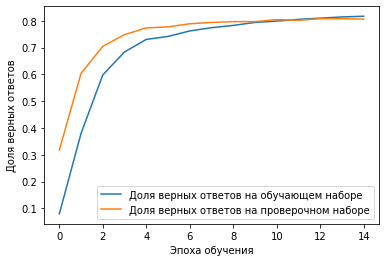

Среднее:  0.7421333312988281
Медиана:  0.7940000295639038


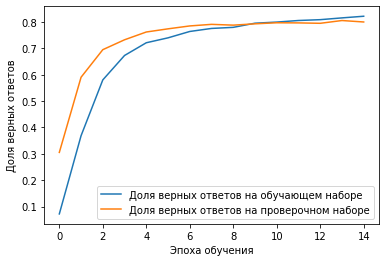

Среднее:  0.73403333624204
Медиана:  0.7910000085830688


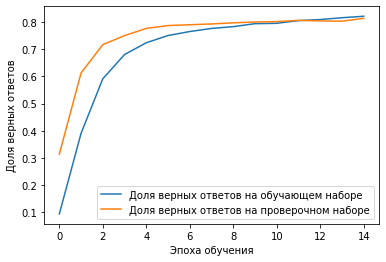

Среднее:  0.7443333347638448
Медиана:  0.7929999828338623
[512, 0, 0, 'relu', 'softmax'] 0.8095
Точность на всех запусках:  [0.81, 0.813, 0.807, 0.8125, 0.817, 0.806, 0.809, 0.8065, 0.8, 0.8135]
Среднее значение точности:  0.8095
Амплитуда разброса точности:  0.017
Среднеквадратичное отклонение точности:  0.004601


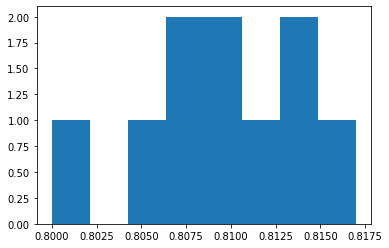

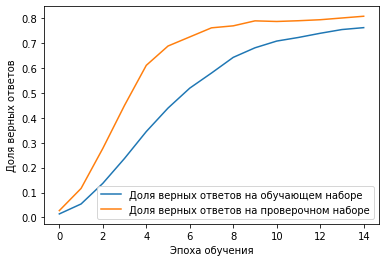

Среднее:  0.612699993699789
Медиана:  0.7609999775886536


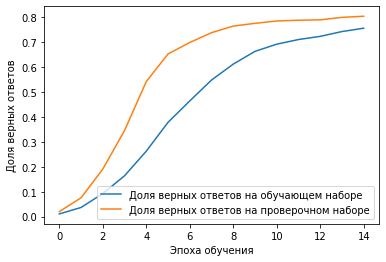

Среднее:  0.5853333346545696
Медиана:  0.7390000224113464


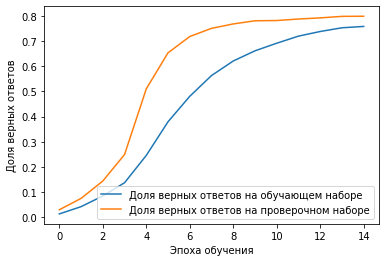

Среднее:  0.5755333268394073
Медиана:  0.75


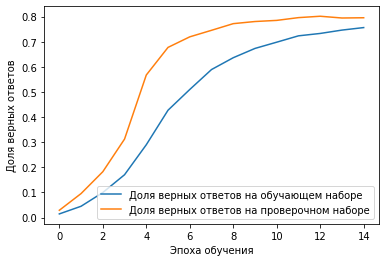

Среднее:  0.5903000051776568
Медиана:  0.7455000281333923


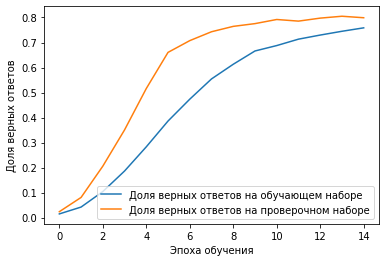

Среднее:  0.5870666640500227
Медиана:  0.7429999709129333


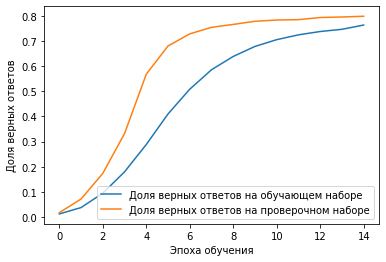

Среднее:  0.5881999984383584
Медиана:  0.7540000081062317


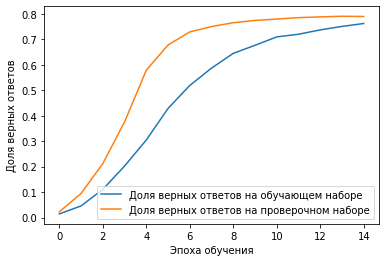

Среднее:  0.5944333334763845
Медиана:  0.7505000233650208


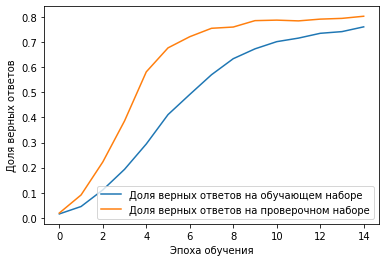

Среднее:  0.5973333268115918
Медиана:  0.7549999952316284


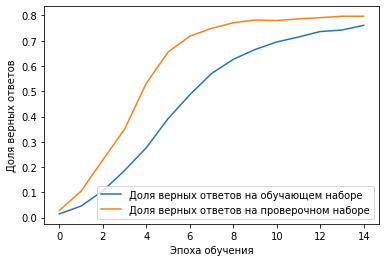

Среднее:  0.5912333267430464
Медиана:  0.7490000128746033


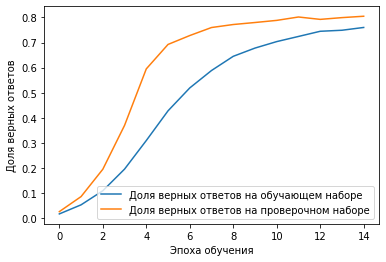

Среднее:  0.5993333339691163
Медиана:  0.7599999904632568
[512, 0, 0, 'relu', 'sigmoid'] 0.7998
Точность на всех запусках:  [0.8075, 0.805, 0.798, 0.7955, 0.799, 0.798, 0.79, 0.803, 0.797, 0.805]
Среднее значение точности:  0.7998
Амплитуда разброса точности:  0.0175
Среднеквадратичное отклонение точности:  0.005031


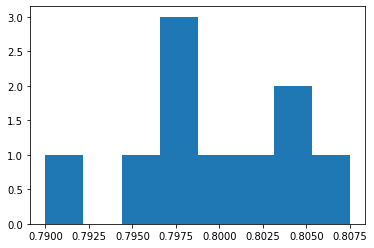

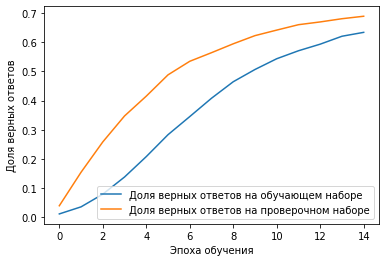

Среднее:  0.49096666897336644
Медиана:  0.5644999742507935


KeyboardInterrupt: ignored

In [ ]:
nets = [[512, 0, 0, 'relu', 'softmax'],
        [512, 0, 0, 'relu', 'sigmoid'],
        [512, 0, 0, 'sigmoid', 'softmax'],
        [512, 0, 0, 'sigmoid', 'sigmoid']]
for currNet in nets:
  acc = testModel(currNet, 10, verb=0)
  print(currNet, round(sum(acc)/len(acc),4))
  print("Точность на всех запусках: ", [round(a,4) for a in acc])
  print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
  print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
  print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
  plt.hist(acc, 8)
  plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10
TESTING_SPLIT=0.1

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def createNetDrop35(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  neoronsL1 = neoronsL1
  base_model = InceptionV3(weights = 'imagenet', 
	include_top = False, 
	input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(neoronsL1, activation=innerActivation)(x)

  x = Dropout(0.25)(x)

  predictions = Dense(NUM_CLASSES, 
	activation=outputActivation)(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
	  layer.trainable = False

#  model.compile(optimizer='adam', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
  
  #Возвращаем созданную сеть
  return model

def testModel(net, iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNetDrop35(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc

9199 train ids 1023 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


Epoch 1/10
144/144 [==============================] - 32s 224ms/step - loss: 3.7589 - accuracy: 0.2613 - val_loss: 2.3839 - val_accuracy: 0.6305
Epoch 2/10
144/144 [==============================] - 30s 205ms/step - loss: 1.7823 - accuracy: 0.6558 - val_loss: 1.1739 - val_accuracy: 0.7576
Epoch 3/10
144/144 [==============================] - 29s 205ms/step - loss: 1.1025 - accuracy: 0.7435 - val_loss: 0.9034 - val_accuracy: 0.7810
Epoch 4/10
144/144 [==============================] - 29s 203ms/step - loss: 0.8951 - accuracy: 0.7733 - val_loss: 0.7953 - val_accuracy: 0.7879
Epoch 5/10
144/144 [==============================] - 29s 204ms/step - loss: 0.7826 - accuracy: 0.7908 - val_loss: 0.7402 - val_accuracy: 0.8025
Epoch 6/10
144/144 [==============================] - 29s 204ms/step - loss: 0.7153 - accuracy: 0.8055 - val_loss: 0.7051 - val_accuracy: 0.8084
Epoch 7/10
144/144 [==============================] - 29s 203ms/step - loss: 0.6693 - accuracy: 0.8124 - val_loss: 0.6896 - val_ac

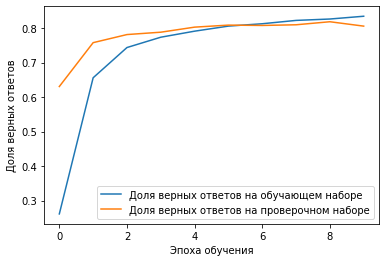

Среднее:  0.780840665102005
Медиана:  0.80840665102005
Epoch 1/10
144/144 [==============================] - 30s 210ms/step - loss: 3.7781 - accuracy: 0.2543 - val_loss: 2.3527 - val_accuracy: 0.6579
Epoch 2/10
144/144 [==============================] - 29s 203ms/step - loss: 1.8048 - accuracy: 0.6488 - val_loss: 1.1698 - val_accuracy: 0.7713
Epoch 3/10
144/144 [==============================] - 29s 205ms/step - loss: 1.1319 - accuracy: 0.7401 - val_loss: 0.8811 - val_accuracy: 0.7879
Epoch 4/10
144/144 [==============================] - 30s 206ms/step - loss: 0.9020 - accuracy: 0.7678 - val_loss: 0.7791 - val_accuracy: 0.8006
Epoch 5/10
144/144 [==============================] - 30s 206ms/step - loss: 0.7990 - accuracy: 0.7861 - val_loss: 0.7281 - val_accuracy: 0.8045
Epoch 6/10
144/144 [==============================] - 30s 206ms/step - loss: 0.7253 - accuracy: 0.8017 - val_loss: 0.6968 - val_accuracy: 0.8084
Epoch 7/10
144/144 [==============================] - 29s 205ms/step - loss

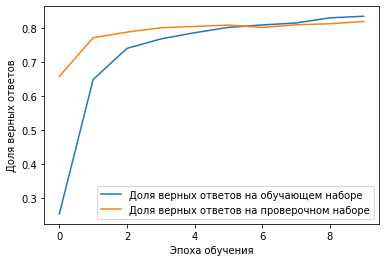

Среднее:  0.7872922837734222
Медиана:  0.80840665102005
Epoch 1/10
144/144 [==============================] - 31s 213ms/step - loss: 3.7739 - accuracy: 0.2641 - val_loss: 2.3698 - val_accuracy: 0.6276
Epoch 2/10
144/144 [==============================] - 30s 206ms/step - loss: 1.7761 - accuracy: 0.6544 - val_loss: 1.1785 - val_accuracy: 0.7507
Epoch 3/10
144/144 [==============================] - 30s 207ms/step - loss: 1.1078 - accuracy: 0.7404 - val_loss: 0.8932 - val_accuracy: 0.7761
Epoch 4/10
144/144 [==============================] - 30s 205ms/step - loss: 0.8966 - accuracy: 0.7704 - val_loss: 0.7953 - val_accuracy: 0.7869
Epoch 5/10
144/144 [==============================] - 29s 203ms/step - loss: 0.7920 - accuracy: 0.7866 - val_loss: 0.7383 - val_accuracy: 0.7947
Epoch 6/10
144/144 [==============================] - 29s 201ms/step - loss: 0.7164 - accuracy: 0.8038 - val_loss: 0.7095 - val_accuracy: 0.8006
Epoch 7/10
144/144 [==============================] - 29s 201ms/step - los

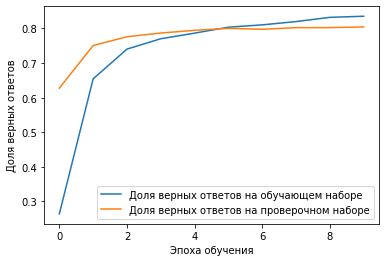

Среднее:  0.7743890583515167
Медиана:  0.8005865216255188
Epoch 1/10
144/144 [==============================] - 30s 208ms/step - loss: 3.7813 - accuracy: 0.2531 - val_loss: 2.3864 - val_accuracy: 0.6393
Epoch 2/10
144/144 [==============================] - 29s 203ms/step - loss: 1.7761 - accuracy: 0.6576 - val_loss: 1.1737 - val_accuracy: 0.7527
Epoch 3/10
144/144 [==============================] - 29s 203ms/step - loss: 1.0998 - accuracy: 0.7433 - val_loss: 0.8887 - val_accuracy: 0.7761
Epoch 4/10
144/144 [==============================] - 29s 204ms/step - loss: 0.8937 - accuracy: 0.7704 - val_loss: 0.7963 - val_accuracy: 0.7830
Epoch 5/10
144/144 [==============================] - 30s 205ms/step - loss: 0.7798 - accuracy: 0.7891 - val_loss: 0.7496 - val_accuracy: 0.7830
Epoch 6/10
144/144 [==============================] - 29s 204ms/step - loss: 0.6998 - accuracy: 0.8052 - val_loss: 0.7123 - val_accuracy: 0.7898
Epoch 7/10
144/144 [==============================] - 30s 207ms/step - l

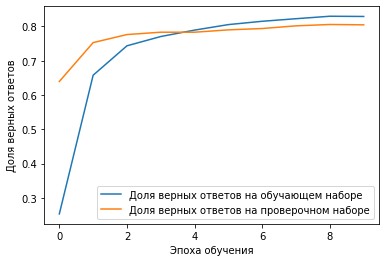

Среднее:  0.7729227840900421
Медиана:  0.7898338437080383
Epoch 1/10
144/144 [==============================] - 31s 212ms/step - loss: 3.7442 - accuracy: 0.2616 - val_loss: 2.3194 - val_accuracy: 0.6491
Epoch 2/10
144/144 [==============================] - 30s 208ms/step - loss: 1.7481 - accuracy: 0.6584 - val_loss: 1.1381 - val_accuracy: 0.7605
Epoch 3/10
144/144 [==============================] - 30s 205ms/step - loss: 1.0997 - accuracy: 0.7415 - val_loss: 0.8735 - val_accuracy: 0.7830
Epoch 4/10
144/144 [==============================] - 29s 201ms/step - loss: 0.8924 - accuracy: 0.7693 - val_loss: 0.7920 - val_accuracy: 0.7889
Epoch 5/10
144/144 [==============================] - 29s 202ms/step - loss: 0.7771 - accuracy: 0.7910 - val_loss: 0.7290 - val_accuracy: 0.7928
Epoch 6/10
144/144 [==============================] - 29s 199ms/step - loss: 0.7137 - accuracy: 0.8018 - val_loss: 0.7189 - val_accuracy: 0.7996
Epoch 7/10
144/144 [==============================] - 29s 199ms/step - l

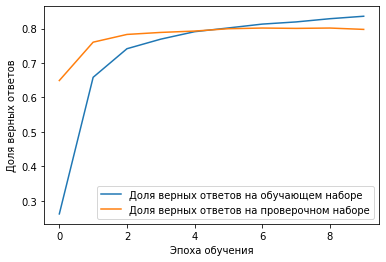

Среднее:  0.7775171160697937
Медиана:  0.7996090054512024


NameError: ignored

In [ ]:
acc = testModel([512, 0, 0, 'relu', 'softmax'], 5, verb=1)
print(currNet, round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()


#ЭКСПЕРИМЕНТЫ


In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
TESTING_SPLIT=0.2

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breed)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def create_model1(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    Dropout(0.25),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.SGD(momentum=0.5), 
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

def testModel1(iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = create_model1()
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

8177 train ids 2045 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 37s 145ms/step - loss: 2.3302 - accuracy: 0.4485 - val_loss: 0.9154 - val_accuracy: 0.7555
Epoch 2/20
256/256 [==============================] - 34s 135ms/step - loss: 0.9002 - accuracy: 0.7420 - val_loss: 0.7202 - val_accuracy: 0.7985
Epoch 3/20
256/256 [==============================] - 40s 157ms/step - loss: 0.6899 - accuracy: 0.7959 - val_loss: 0.6680 - val_accuracy: 0.8054
Epoch 4/20
256/256 [==============================] - 40s 158ms/step - loss: 0.5770 - accuracy: 0.8267 - val_loss: 0.6346 - val_accuracy: 0.8147
Epoch 5/20
256/256 [==============================] - 35s 136ms/step - loss: 0.4896 - accuracy: 0.8529 - val_loss: 0.6244 - val_accuracy: 0.8186
Epoch 6/20
256/256 [==============================] - 40s 157ms/step - loss: 0.4354 - accuracy: 0.8655 - val_loss: 0.6087 - val_accuracy: 0.8161
Epoch 7/20
256/256 [=================

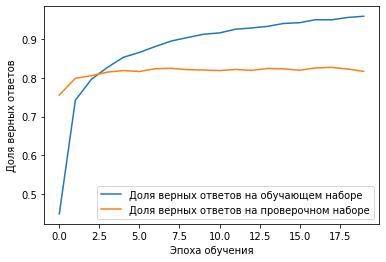

Среднее:  0.8157457262277603
Медиана:  0.8185818791389465
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 38s 147ms/step - loss: 2.2568 - accuracy: 0.4702 - val_loss: 0.9179 - val_accuracy: 0.7526
Epoch 2/20
256/256 [==============================] - 33s 127ms/step - loss: 0.8925 - accuracy: 0.7405 - val_loss: 0.7213 - val_accuracy: 0.7853
Epoch 3/20
256/256 [==============================] - 41s 159ms/step - loss: 0.6859 - accuracy: 0.7931 - val_loss: 0.6568 - val_accuracy: 0.8137
Epoch 4/20
256/256 [==============================] - 41s 158ms/step - loss: 0.5615 - accuracy: 0.8240 - val_loss: 0.6331 - val_accuracy: 0.8152
Epoch 5/20
256/256 [==============================] - 41s 158ms/step - loss: 0.4909 - accuracy: 0.8481 - val_loss: 0.6119 - val_accuracy: 0.8156
Epoch 6/20
256/256 [==============================] - 41s 159ms/step - loss: 0.4232 - accuracy: 0.8689 - val_loss: 0.6177 - 

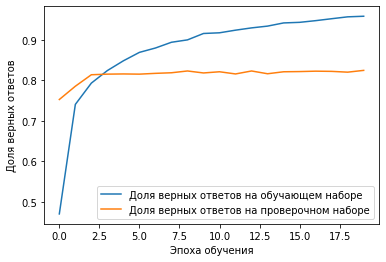

Среднее:  0.8140831291675568
Медиана:  0.8210269212722778
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 39s 150ms/step - loss: 2.3129 - accuracy: 0.4566 - val_loss: 0.9330 - val_accuracy: 0.7384
Epoch 2/20
256/256 [==============================] - 39s 153ms/step - loss: 0.9034 - accuracy: 0.7416 - val_loss: 0.7107 - val_accuracy: 0.7868
Epoch 3/20
256/256 [==============================] - 39s 152ms/step - loss: 0.6875 - accuracy: 0.7917 - val_loss: 0.6412 - val_accuracy: 0.8000
Epoch 4/20
256/256 [==============================] - 40s 156ms/step - loss: 0.5667 - accuracy: 0.8276 - val_loss: 0.6114 - val_accuracy: 0.8108
Epoch 5/20
256/256 [==============================] - 39s 153ms/step - loss: 0.4916 - accuracy: 0.8479 - val_loss: 0.6053 - val_accuracy: 0.8098
Epoch 6/20
256/256 [==============================] - 39s 152ms/step - loss: 0.4308 - accuracy: 0.8721 - val_loss: 0.5965 - 

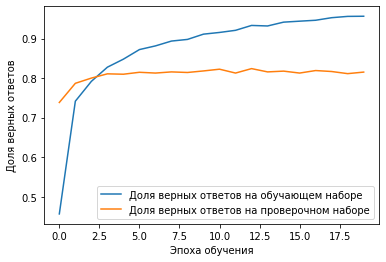

Среднее:  0.8094131916761398
Медиана:  0.8224939107894897
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 28s 108ms/step - loss: 2.3020 - accuracy: 0.4580 - val_loss: 0.9428 - val_accuracy: 0.7531
Epoch 2/20
256/256 [==============================] - 27s 106ms/step - loss: 0.9111 - accuracy: 0.7380 - val_loss: 0.7368 - val_accuracy: 0.7844
Epoch 3/20
256/256 [==============================] - 27s 107ms/step - loss: 0.6885 - accuracy: 0.7948 - val_loss: 0.6699 - val_accuracy: 0.8044
Epoch 4/20
256/256 [==============================] - 27s 105ms/step - loss: 0.5687 - accuracy: 0.8288 - val_loss: 0.6252 - val_accuracy: 0.8093
Epoch 5/20
256/256 [==============================] - 27s 106ms/step - loss: 0.4890 - accuracy: 0.8515 - val_loss: 0.6192 - val_accuracy: 0.8127
Epoch 6/20
256/256 [==============================] - 27s 106ms/step - loss: 0.4373 - accuracy: 0.8663 - val_loss: 0.6035 - 

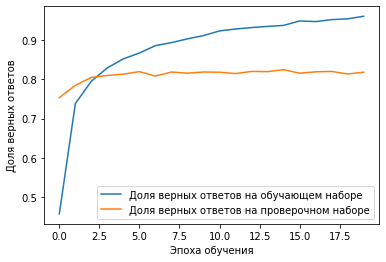

Среднее:  0.8110268831253051
Медиана:  0.8176038861274719
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 38s 150ms/step - loss: 2.3109 - accuracy: 0.4617 - val_loss: 0.9138 - val_accuracy: 0.7491
Epoch 2/20
256/256 [==============================] - 39s 153ms/step - loss: 0.8978 - accuracy: 0.7438 - val_loss: 0.7155 - val_accuracy: 0.7800
Epoch 3/20
256/256 [==============================] - 39s 152ms/step - loss: 0.6693 - accuracy: 0.8020 - val_loss: 0.6301 - val_accuracy: 0.8068
Epoch 4/20
256/256 [==============================] - 40s 155ms/step - loss: 0.5745 - accuracy: 0.8243 - val_loss: 0.6244 - val_accuracy: 0.8068
Epoch 5/20
256/256 [==============================] - 40s 155ms/step - loss: 0.4866 - accuracy: 0.8503 - val_loss: 0.6065 - val_accuracy: 0.8181
Epoch 6/20
256/256 [==============================] - 39s 153ms/step - loss: 0.4345 - accuracy: 0.8690 - val_loss: 0.5947 - 

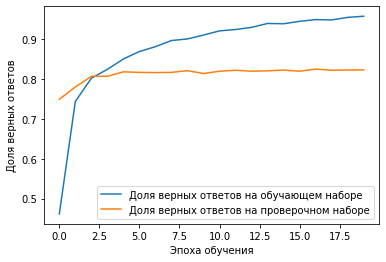

Среднее:  0.8130562424659729
Медиана:  0.8195599317550659
0.8194
Точность на всех запусках:  [0.8166, 0.8244, 0.8152, 0.8176, 0.823]
Среднее значение точности:  0.8194
Амплитуда разброса точности:  0.0093
Среднеквадратичное отклонение точности:  0.003667


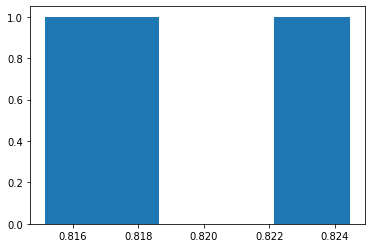

In [ ]:
acc, model = testModel1(5, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
TESTING_SPLIT=0.2

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breed)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def create_model2(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    Dropout(0.25),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.SGD(momentum=0.1, nesterov=True), 
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

def testModel2(iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = create_model2()
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

8177 train ids 2045 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 38s 148ms/step - loss: 2.9370 - accuracy: 0.3389 - val_loss: 1.2988 - val_accuracy: 0.6724
Epoch 2/20
256/256 [==============================] - 41s 159ms/step - loss: 1.2007 - accuracy: 0.6723 - val_loss: 0.8610 - val_accuracy: 0.7628
Epoch 3/20
256/256 [==============================] - 39s 152ms/step - loss: 0.8872 - accuracy: 0.7482 - val_loss: 0.7396 - val_accuracy: 0.7902
Epoch 4/20
256/256 [==============================] - 42s 163ms/step - loss: 0.7204 - accuracy: 0.7884 - val_loss: 0.6780 - val_accuracy: 0.8020
Epoch 5/20
256/256 [==============================] - 40s 156ms/step - loss: 0.6547 - accuracy: 0.8070 - val_loss: 0.6428 - val_accuracy: 0.8117
Epoch 6/20
256/256 [==============================] - 41s 158ms/step - loss: 0.5731 - accuracy: 0.8249 - val_loss: 0.6299 - val_accuracy: 0.8103
Epoch 7/20
256/256 [=================

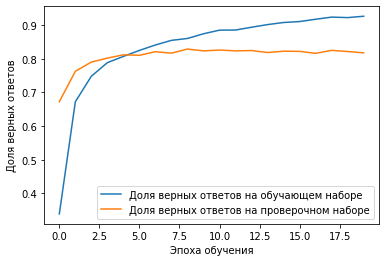

Среднее:  0.8078239619731903
Медиана:  0.8259168863296509
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 39s 152ms/step - loss: 3.0413 - accuracy: 0.3270 - val_loss: 1.2947 - val_accuracy: 0.6826
Epoch 2/20
256/256 [==============================] - 37s 144ms/step - loss: 1.2123 - accuracy: 0.6752 - val_loss: 0.8562 - val_accuracy: 0.7638
Epoch 3/20
256/256 [==============================] - 41s 160ms/step - loss: 0.8989 - accuracy: 0.7422 - val_loss: 0.7337 - val_accuracy: 0.7853
Epoch 4/20
256/256 [==============================] - 39s 153ms/step - loss: 0.7501 - accuracy: 0.7775 - val_loss: 0.6742 - val_accuracy: 0.8020
Epoch 5/20
256/256 [==============================] - 39s 152ms/step - loss: 0.6517 - accuracy: 0.8047 - val_loss: 0.6439 - val_accuracy: 0.8142
Epoch 6/20
256/256 [==============================] - 40s 158ms/step - loss: 0.5767 - accuracy: 0.8261 - val_loss: 0.6281 - 

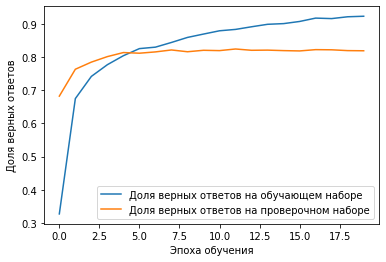

Среднее:  0.8073838710784912
Медиана:  0.8200489282608032
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 37s 144ms/step - loss: 2.9502 - accuracy: 0.3355 - val_loss: 1.2607 - val_accuracy: 0.6861
Epoch 2/20
256/256 [==============================] - 37s 145ms/step - loss: 1.2127 - accuracy: 0.6698 - val_loss: 0.8420 - val_accuracy: 0.7623
Epoch 3/20
256/256 [==============================] - 38s 150ms/step - loss: 0.8893 - accuracy: 0.7422 - val_loss: 0.7141 - val_accuracy: 0.7922
Epoch 4/20
256/256 [==============================] - 41s 160ms/step - loss: 0.7336 - accuracy: 0.7815 - val_loss: 0.6610 - val_accuracy: 0.8000
Epoch 5/20
256/256 [==============================] - 40s 156ms/step - loss: 0.6508 - accuracy: 0.8069 - val_loss: 0.6310 - val_accuracy: 0.8024
Epoch 6/20
256/256 [==============================] - 40s 156ms/step - loss: 0.5805 - accuracy: 0.8249 - val_loss: 0.6140 - 

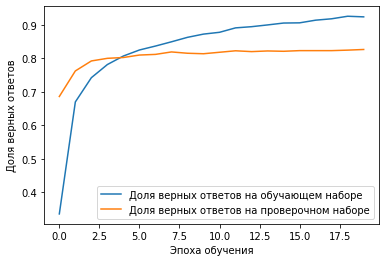

Среднее:  0.8067970722913742
Медиана:  0.8180928826332092
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 38s 147ms/step - loss: 2.9886 - accuracy: 0.3361 - val_loss: 1.3261 - val_accuracy: 0.6675
Epoch 2/20
256/256 [==============================] - 33s 129ms/step - loss: 1.2231 - accuracy: 0.6647 - val_loss: 0.8868 - val_accuracy: 0.7550
Epoch 3/20
256/256 [==============================] - 31s 121ms/step - loss: 0.8882 - accuracy: 0.7427 - val_loss: 0.7477 - val_accuracy: 0.7858
Epoch 4/20
256/256 [==============================] - 34s 133ms/step - loss: 0.7440 - accuracy: 0.7762 - val_loss: 0.7026 - val_accuracy: 0.7951
Epoch 5/20
256/256 [==============================] - 38s 147ms/step - loss: 0.6438 - accuracy: 0.8070 - val_loss: 0.6649 - val_accuracy: 0.7966
Epoch 6/20
256/256 [==============================] - 38s 149ms/step - loss: 0.5890 - accuracy: 0.8227 - val_loss: 0.6396 - 

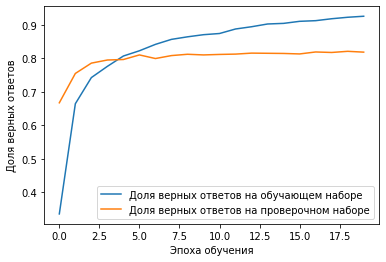

Среднее:  0.7999999910593033
Медиана:  0.8117359280586243
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 39s 154ms/step - loss: 3.0011 - accuracy: 0.3302 - val_loss: 1.3037 - val_accuracy: 0.6836
Epoch 2/20
256/256 [==============================] - 39s 153ms/step - loss: 1.2192 - accuracy: 0.6683 - val_loss: 0.8731 - val_accuracy: 0.7628
Epoch 3/20
256/256 [==============================] - 39s 152ms/step - loss: 0.8876 - accuracy: 0.7449 - val_loss: 0.7499 - val_accuracy: 0.7868
Epoch 4/20
256/256 [==============================] - 38s 150ms/step - loss: 0.7434 - accuracy: 0.7766 - val_loss: 0.6930 - val_accuracy: 0.7932
Epoch 5/20
256/256 [==============================] - 39s 151ms/step - loss: 0.6487 - accuracy: 0.8059 - val_loss: 0.6627 - val_accuracy: 0.7990
Epoch 6/20
256/256 [==============================] - 38s 150ms/step - loss: 0.5836 - accuracy: 0.8179 - val_loss: 0.6409 - 

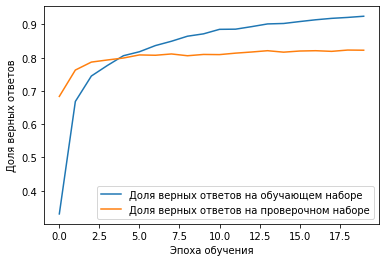

Среднее:  0.8025672376155853
Медиана:  0.8092909455299377
0.8209
Точность на всех запусках:  [0.8176, 0.8196, 0.8264, 0.8186, 0.8225]
Среднее значение точности:  0.8209
Амплитуда разброса точности:  0.0088
Среднеквадратичное отклонение точности:  0.00319


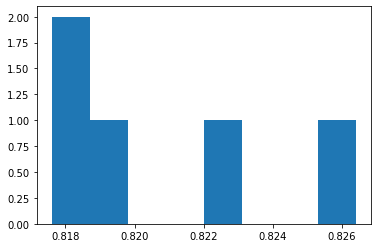

In [ ]:
acc, model2 = testModel2(5, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
TESTING_SPLIT=0.2

NUM_CLASSES = 120
IMAGE_SIZE = 224

working_path = "dogs1/"
labels = pd.read_csv(working_path + 'labels.csv')

train_ids, valid_ids = train_test_split(labels, 
	test_size = TESTING_SPLIT)

print(len(train_ids), 'train ids', len(valid_ids), 
	'validation ids')
print('Total', len(labels), 'testing images')

dogs_labels = labels['breed']
dogs_labels = np.array(dogs_labels)

unique_breed = np.unique(dogs_labels)

boolean_labels = [dogs_labels == unique_breed for dogs_labels in dogs_labels]
filenames = ['/content/dogs1/train/' + fname + '.jpg' for fname in labels['id']]

X = filenames
y = boolean_labels

NUM_IMAGES = len(X)

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=TESTING_SPLIT,
                                                random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3]
OUTPUT_SHAPE = len(unique_breed)

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

def create_model3(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    Dropout(0.35),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.SGD(momentum=0.1, nesterov=True), 
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

def testModel3(iterations, epochs = EPOCHS, verb = 1):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = create_model3()
    #Обучаем сеть
    history = model.fit(x=train_data, epochs=epochs, validation_data=val_data, verbose=verb, validation_freq=1)
    plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()
    print("Среднее: ", sum(history.history['val_accuracy'])/EPOCHS)
    print("Медиана: ", (history.history['val_accuracy'][EPOCHS//2]))
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_accuracy"][-1])
  
  #Возвращаем лист точностей
  return acc, model

8177 train ids 2045 validation ids
Total 10222 testing images
Creating training data batches...
Creating validation data batches...


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 39s 154ms/step - loss: 3.1111 - accuracy: 0.3060 - val_loss: 1.3173 - val_accuracy: 0.6719
Epoch 2/20
256/256 [==============================] - 35s 136ms/step - loss: 1.3470 - accuracy: 0.6310 - val_loss: 0.8745 - val_accuracy: 0.7609
Epoch 3/20
256/256 [==============================] - 40s 157ms/step - loss: 0.9922 - accuracy: 0.7104 - val_loss: 0.7486 - val_accuracy: 0.7892
Epoch 4/20
256/256 [==============================] - 41s 159ms/step - loss: 0.8358 - accuracy: 0.7489 - val_loss: 0.6973 - val_accuracy: 0.7985
Epoch 5/20
256/256 [==============================] - 41s 162ms/step - loss: 0.7255 - accuracy: 0.7807 - val_loss: 0.6560 - val_accuracy: 0.8039
Epoch 6/20
256/256 [==============================] - 38s 148ms/step - loss: 0.6468 - accuracy: 0.8032 - val_loss: 0.6459 - val_accuracy: 0.8039
Epoch 7/20
256/256 [=================

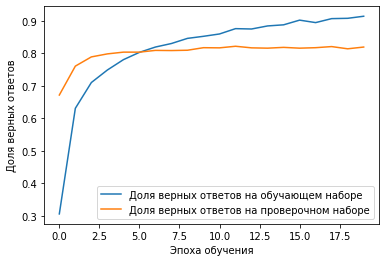

Среднее:  0.8026650279760361
Медиана:  0.8171148896217346
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 30s 116ms/step - loss: 3.2614 - accuracy: 0.2878 - val_loss: 1.3146 - val_accuracy: 0.6724
Epoch 2/20
256/256 [==============================] - 30s 116ms/step - loss: 1.3562 - accuracy: 0.6275 - val_loss: 0.8528 - val_accuracy: 0.7628
Epoch 3/20
256/256 [==============================] - 30s 117ms/step - loss: 1.0084 - accuracy: 0.7097 - val_loss: 0.7355 - val_accuracy: 0.7770
Epoch 4/20
256/256 [==============================] - 30s 116ms/step - loss: 0.8297 - accuracy: 0.7542 - val_loss: 0.6748 - val_accuracy: 0.7976
Epoch 5/20
256/256 [==============================] - 30s 117ms/step - loss: 0.7218 - accuracy: 0.7823 - val_loss: 0.6470 - val_accuracy: 0.8034
Epoch 6/20
256/256 [==============================] - 30s 119ms/step - loss: 0.6358 - accuracy: 0.8107 - val_loss: 0.6292 - 

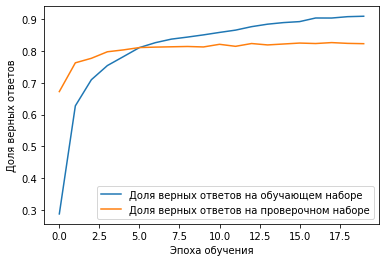

Среднее:  0.8049144268035888
Медиана:  0.8210269212722778
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 40s 157ms/step - loss: 3.1977 - accuracy: 0.2956 - val_loss: 1.3120 - val_accuracy: 0.6797
Epoch 2/20
256/256 [==============================] - 37s 146ms/step - loss: 1.3388 - accuracy: 0.6401 - val_loss: 0.8759 - val_accuracy: 0.7614
Epoch 3/20
256/256 [==============================] - 41s 160ms/step - loss: 0.9991 - accuracy: 0.7092 - val_loss: 0.7493 - val_accuracy: 0.7863
Epoch 4/20
256/256 [==============================] - 42s 166ms/step - loss: 0.8382 - accuracy: 0.7533 - val_loss: 0.6986 - val_accuracy: 0.7941
Epoch 5/20
256/256 [==============================] - 42s 164ms/step - loss: 0.7228 - accuracy: 0.7786 - val_loss: 0.6603 - val_accuracy: 0.8049
Epoch 6/20
256/256 [==============================] - 42s 163ms/step - loss: 0.6524 - accuracy: 0.8021 - val_loss: 0.6478 - 

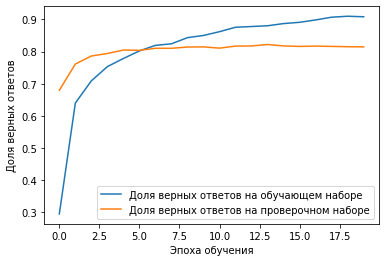

Среднее:  0.8022004753351212
Медиана:  0.8107579350471497
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 40s 158ms/step - loss: 3.2013 - accuracy: 0.2920 - val_loss: 1.3023 - val_accuracy: 0.6924
Epoch 2/20
256/256 [==============================] - 34s 133ms/step - loss: 1.3428 - accuracy: 0.6370 - val_loss: 0.8571 - val_accuracy: 0.7721
Epoch 3/20
256/256 [==============================] - 39s 153ms/step - loss: 0.9925 - accuracy: 0.7193 - val_loss: 0.7331 - val_accuracy: 0.7868
Epoch 4/20
256/256 [==============================] - 40s 158ms/step - loss: 0.8373 - accuracy: 0.7579 - val_loss: 0.6722 - val_accuracy: 0.8010
Epoch 5/20
256/256 [==============================] - 35s 138ms/step - loss: 0.7263 - accuracy: 0.7832 - val_loss: 0.6439 - val_accuracy: 0.8073
Epoch 6/20
256/256 [==============================] - 37s 143ms/step - loss: 0.6497 - accuracy: 0.8068 - val_loss: 0.6300 - 

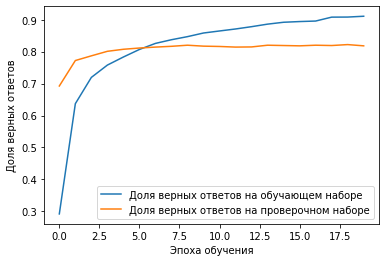

Среднее:  0.8060146629810333
Медиана:  0.81613689661026
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
256/256 [==============================] - 32s 126ms/step - loss: 3.1808 - accuracy: 0.3011 - val_loss: 1.3337 - val_accuracy: 0.6753
Epoch 2/20
256/256 [==============================] - 32s 125ms/step - loss: 1.3611 - accuracy: 0.6286 - val_loss: 0.8726 - val_accuracy: 0.7633
Epoch 3/20
256/256 [==============================] - 32s 126ms/step - loss: 0.9814 - accuracy: 0.7147 - val_loss: 0.7523 - val_accuracy: 0.7790
Epoch 4/20
256/256 [==============================] - 32s 125ms/step - loss: 0.8330 - accuracy: 0.7569 - val_loss: 0.6915 - val_accuracy: 0.7966
Epoch 5/20
256/256 [==============================] - 32s 126ms/step - loss: 0.7305 - accuracy: 0.7862 - val_loss: 0.6644 - val_accuracy: 0.8005
Epoch 6/20
256/256 [==============================] - 32s 126ms/step - loss: 0.6529 - accuracy: 0.8038 - val_loss: 0.6412 - va

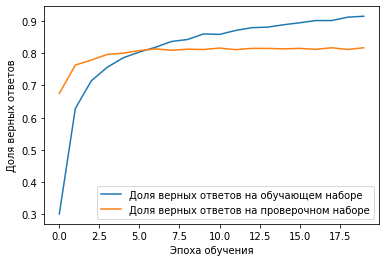

Среднее:  0.8007579326629639
Медиана:  0.81613689661026
0.8185
Точность на всех запусках:  [0.8196, 0.823, 0.8147, 0.8181, 0.8171]
Среднее значение точности:  0.8185
Амплитуда разброса точности:  0.0083
Среднеквадратичное отклонение точности:  0.002756


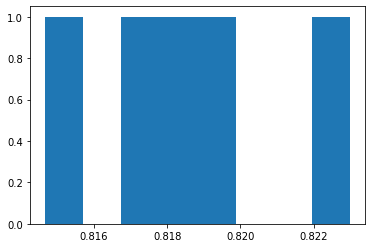

In [ ]:
acc, model3 = testModel3(5, verb=1)
print(round(sum(acc)/len(acc),4))
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))
plt.hist(acc, 8)
plt.show()